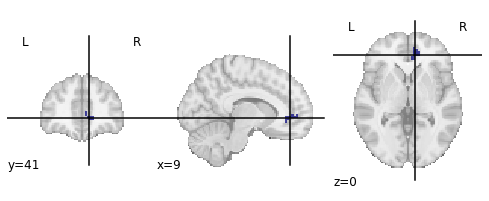

,Subject,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,tsnr,fd_mean
0,sub-1001,1,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076
1,sub-1006,1,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651
2,sub-1009,1,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386
3,sub-1010,1,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449
4,sub-1011,1,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732


In [13]:
import os 
import pandas as pd
from nilearn import plotting, input_data
import matplotlib.pyplot as plt
import seaborn as sms
import re
import numpy as np

task='sharedreward'

mask='../masks/conn_rightVS_VMPFC_cov.nii.gz'
plotting.plot_roi(mask)
vs_masker=input_data.NiftiMasker(mask_img=mask)
plt.show()

fsl_data='/data/projects/istart-%s/derivatives/fsl'%(task)


df=pd.read_excel('../derivatives/covariates/final_output_composite.xls')
df=df.iloc[:47,:]
df.dropna(axis=1,inplace=True)
df['Subject'] = 'sub-' + df['Subject'].astype(str)
df.head()

# Correlation Between Reward Sensitivity and Subst.Use

Correlation R^2:0.059892827025478414 p: 0.10517926334038827


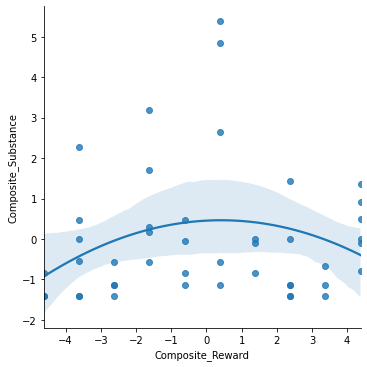

In [4]:
sms.lmplot(x='Composite_Reward',y='Composite_Substance',data=df,order=2)
from scipy.stats import pearsonr
r,p=pearsonr(x=df['Composite_Reward_Squared'],y=df['Composite_Substance'])
print("Correlation R^2:%s p: %s"%(r**2,p))

## Collecting VS activation for Each subject

In [17]:
data=[]

print(df['Subject'][0])
for sub in df['Subject']:
    activations=[]
    cope_list=[]

    for runs in ['1','2']:
        for cope in [1,2,7]:
            image='%s/%s/L1_task-sharedreward_model-3_type-ppi_seed-VS_thr5_run-%s_sm-6.feat/stats/cope%s.nii.gz'%(
                fsl_data,sub,runs,cope)

            act_value_array=vs_masker.fit_transform(image)
            act_value=np.mean(act_value_array)
            activations.append(act_value)
            cope_list.append(cope)
        data.append([sub,runs]+activations)

neuro_df=pd.DataFrame(data=data,columns=['Subject','Run','C Pun','C Rew','Rew>Pun'])
df = df[df.Subject !='sub-3200']
df.groupby(by ='Subject').mean
big_df=pd.merge(df,neuro_df,on='Subject')
display(big_df.head())
plotting.plot_roi(vs_masker.mask_img_)


sub-1001


ValueError: File not found: '/data/projects/istart-sharedreward/derivatives/fsl/sub-3152/L1_task-sharedreward_model-3_type-ppi_seed-VS_thr5_run-2_sm-6.feat/stats/cope1.nii.gz'

In [ ]:
big_df.head()
big_df.to_csv("For_David_VSAct.tsv",sep='\t',index=False)

## Reward Sensitivity and VS Activation

In [ ]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df,order=2)
    plt.show()

## Substance Use and VS Activation

Correlation between Act Gain>Loss and Substance Use: 
 R^2 0.005718625389998625 p: 0.6134185888345356


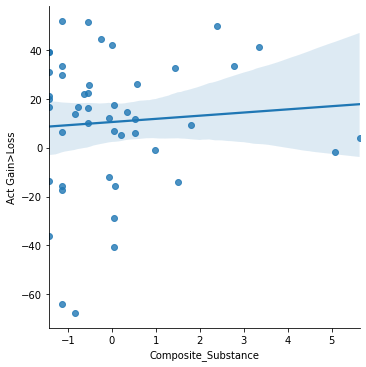

Correlation between Act Gain>Neut and Substance Use: 
 R^2 0.004498481397995701 p: 0.6541986745435381


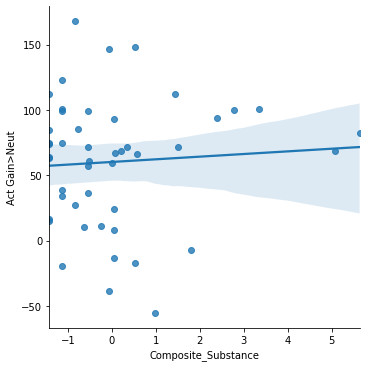

Correlation between Act Loss>Neut and Substance Use: 
 R^2 0.00037822248450688703 p: 0.8967639480290486


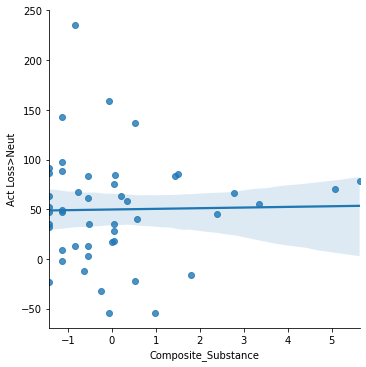

Correlation between Act Salience and Substance Use: 
 R^2 0.026635129745591003 p: 0.2730340042819388


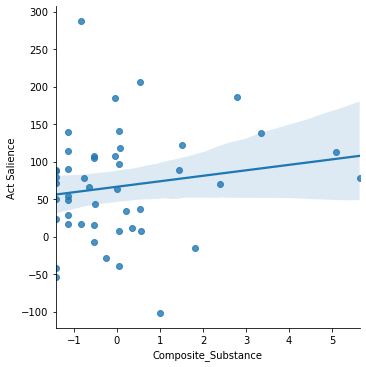

Correlation between Act Hit-Miss and Substance Use: 
 R^2 0.025280692558875738 p: 0.28574645955464334


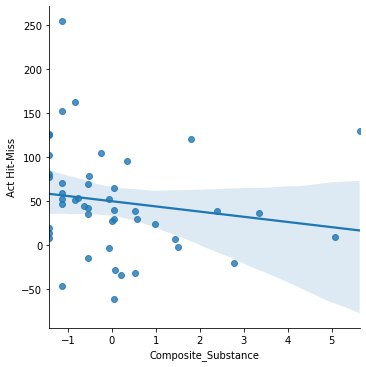

Correlation between Act LG-SG and Substance Use: 
 R^2 0.05918641882977506 p: 0.09939132876957273


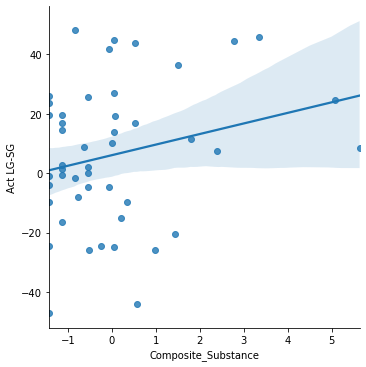

Correlation between Act LL-SL and Substance Use: 
 R^2 0.0013784386859684885 p: 0.804317337311261


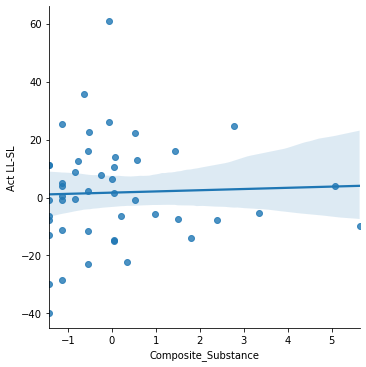

In [7]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Substance'],big_df[col])
    print("Correlation between %s and Substance Use: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Substance',y=col,
               data=big_df)
    plt.show()
    #r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    #print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    #col,r,p))
    #sms.lmplot(x='Composite_Reward',y=col,
    #           data=big_df,order=2)
    #plt.show()

## Interaction with Substance Use


In [8]:
big_df["Low_Substance"] = (big_df.Composite_Substance<df.Composite_Substance.quantile()).replace({True:'Low', False:'High'})

Correlation between Act Gain>Loss and Composite Reward: 
 R^2 0.023845530544171184 p: 0.3000269245494836


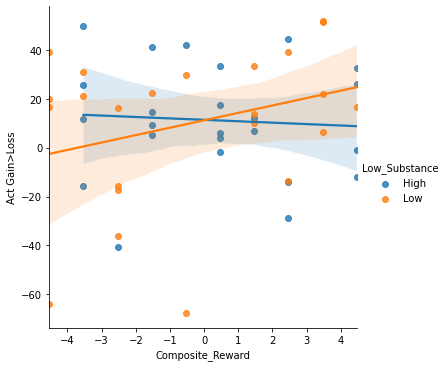

Correlation between Act Gain>Loss and Squared Composite Reward: 
 R^2 0.0023555952655911335 p: 0.745963155633228


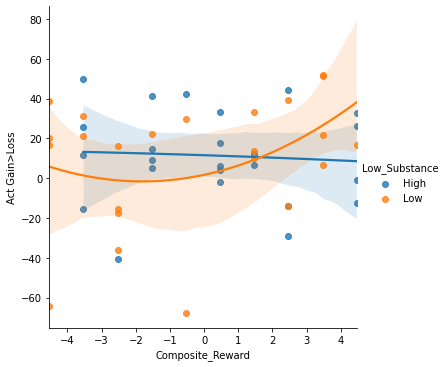

Correlation between Act Gain>Neut and Composite Reward: 
 R^2 0.007258989979423084 p: 0.5690790648352174


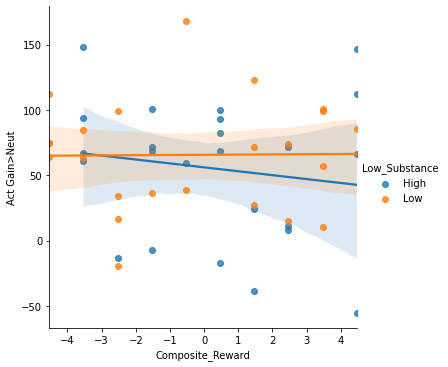

Correlation between Act Gain>Neut and Squared Composite Reward: 
 R^2 0.03209861065843534 p: 0.22821508302963345


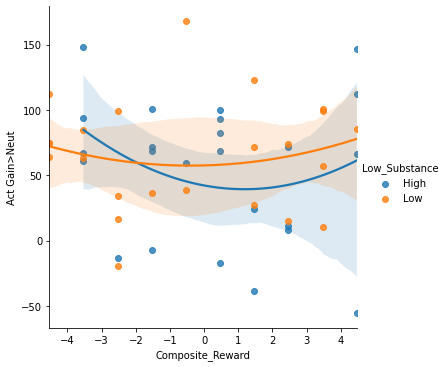

Correlation between Act Loss>Neut and Composite Reward: 
 R^2 0.024637195424330696 p: 0.2920422290155928


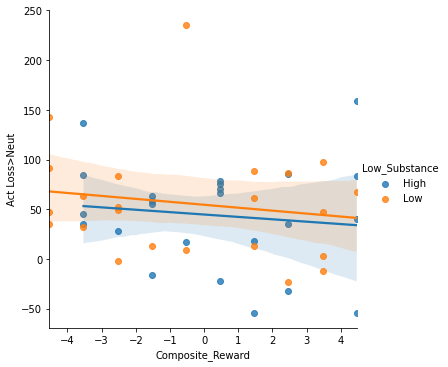

Correlation between Act Loss>Neut and Squared Composite Reward: 
 R^2 0.020162723204321713 p: 0.3410488993829558


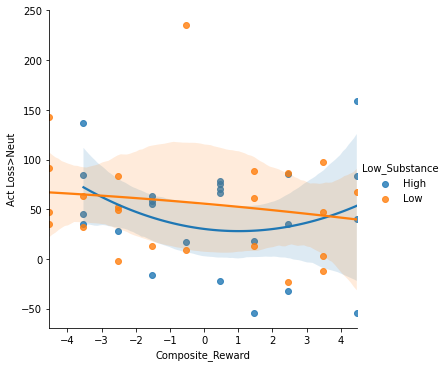

Correlation between Act Salience and Composite Reward: 
 R^2 0.0043932572350874255 p: 0.6580149917307546


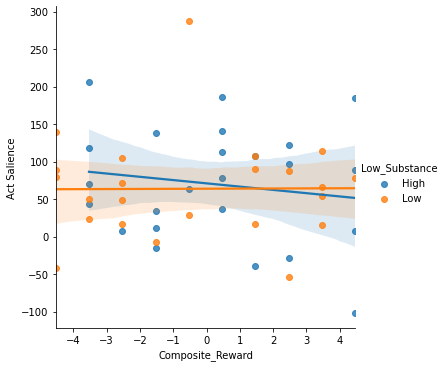

Correlation between Act Salience and Squared Composite Reward: 
 R^2 0.007120839672683757 p: 0.5727920467497306


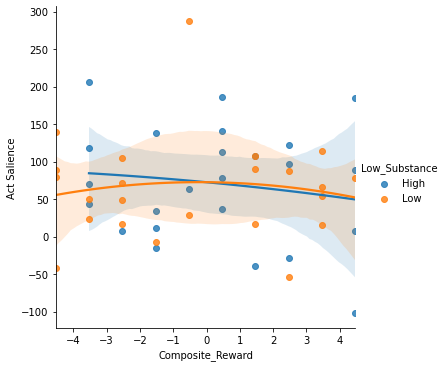

Correlation between Act Hit-Miss and Composite Reward: 
 R^2 0.02992774079654626 p: 0.2448862605011443


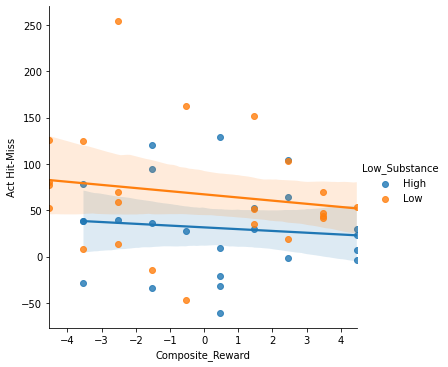

Correlation between Act Hit-Miss and Squared Composite Reward: 
 R^2 0.0035061913224264294 p: 0.6925767300516514


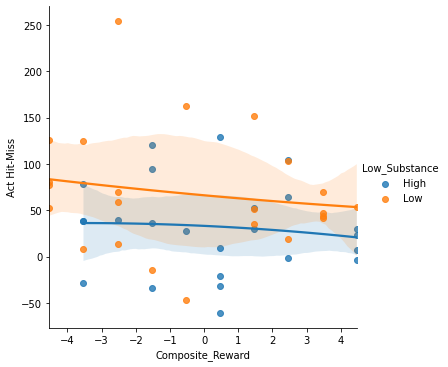

Correlation between Act LG-SG and Composite Reward: 
 R^2 0.03812108002812773 p: 0.18844408267073628


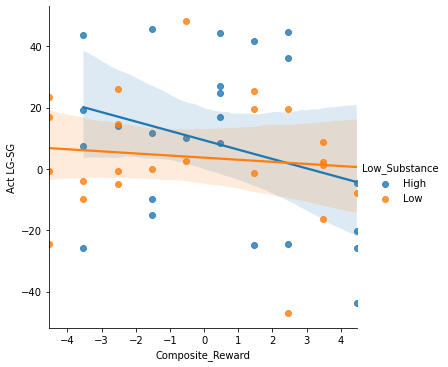

Correlation between Act LG-SG and Squared Composite Reward: 
 R^2 0.1582007864296785 p: 0.005629506303278012


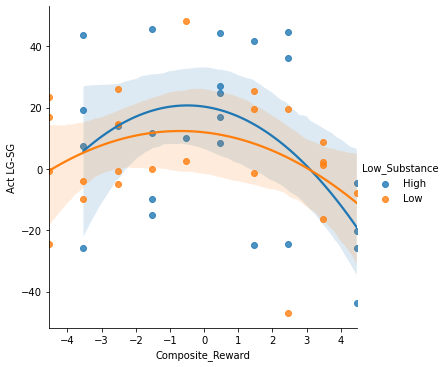

Correlation between Act LL-SL and Composite Reward: 
 R^2 0.1091767157475712 p: 0.02330681958108417


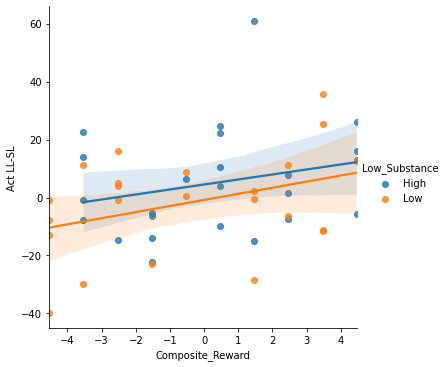

Correlation between Act LL-SL and Squared Composite Reward: 
 R^2 0.0003872108035442503 p: 0.8955511823133154


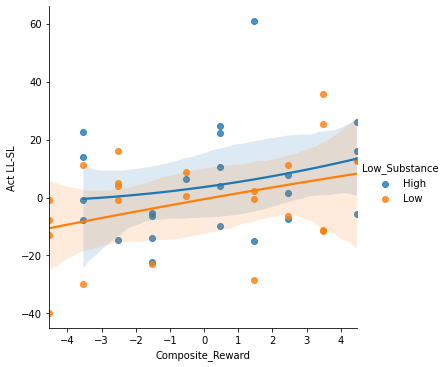

In [9]:
copes=[col for col in big_df.columns if col.startswith('Act')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r**2,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df,order=2)
    plt.show()

# PscyhoPhysiological Interactions

In [10]:
ofc_coords=[2,46,-8]
from nilearn import input_data

seed_masker = input_data.NiftiSpheresMasker(
    ofc_coords, radius=8)
data=[]
cope_map={1:'Large Gain', 2: 'Small Gain',
          3: 'Large Loss', 4: 'Small Loss', 5: 'Hit',
         6:'Miss',7:'Neutral',8:'Gain>Loss',9:'Gain>Neut',
         10:'Loss>Neut',11:'Salience',12:'Hit-Miss',
          13:'LG-SG',14:'LL-SL'}
print(df['Fnames-act'][0])
for fname in df['Fnames-act']:
    sub=re.search('fsl/(.*)/L',fname).group(1)
    level=re.search('sub-..../(.*)_task',fname).group(1)
    activations=[]
    cope_list=[]
    display(sub)
    for cope in [8,9,10,11,12,13,14]:
        
        if level=='L1':
            image='%s/%s/L1_task-mid_model-1_type-ppi_seed-NAcc_run-1_sm-.feat/stats/cope%s.nii.gz'%(
            fsl_data,sub,cope)
        if level=='L2':
            image='%s/%s/L2_task-mid_model-1_type-ppi_seed-NAcc.gfeat/cope%s.feat/stats/cope1.nii.gz'%(
            fsl_data,sub,cope)
        
        act_value_array=vs_masker.fit_transform(image)
        act_value=np.mean(act_value_array)
        activations.append(act_value)
        cope_list.append(cope)
    data.append([sub]+activations)

conn_df=pd.DataFrame(data=data,columns=['Subject','Conn Gain>Loss','Conn Gain>Neut',
         'Conn Loss>Neut','Conn Salience','Conn Hit-Miss','Conn LG-SG','Conn LL-SL'])
big_df=pd.merge(big_df,conn_df,on='Subject')
display(big_df.head())

/data/projects/istart-mid/derivatives/fsl/sub-1001/L2_task-mid_model-1_type-act.gfeat/cope1.feat/stats/cope1.nii.gz


'sub-1001'

'sub-1003'

'sub-1004'

'sub-1006'

'sub-1009'

'sub-1010'

'sub-1011'

'sub-1012'

'sub-1013'

'sub-1015'

'sub-1016'

'sub-1019'

'sub-1021'

'sub-1242'

'sub-1243'

'sub-1244'

'sub-1245'

'sub-1247'

'sub-1248'

'sub-1249'

'sub-1255'

'sub-1276'

'sub-1282'

'sub-1286'

'sub-1294'

'sub-1300'

'sub-1301'

'sub-1302'

'sub-1303'

'sub-3116'

'sub-3125'

'sub-3140'

'sub-3143'

'sub-3166'

'sub-3167'

'sub-3170'

'sub-3173'

'sub-3175'

'sub-3176'

'sub-3189'

'sub-3190'

'sub-3199'

'sub-3200'

'sub-3206'

'sub-3212'

'sub-3218'

'sub-3220'

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,...,Act LG-SG,Act LL-SL,Low_Substance,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,...,17.066702,22.209206,High,-0.022441,0.062319,0.087859,0.012782,-0.088774,-0.018264,-0.019006
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,...,27.042622,10.579357,High,-0.300095,-0.003371,0.296723,0.217825,-0.190221,-0.006840,0.054273
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,...,-24.435888,7.748005,High,-0.065485,-0.254023,-0.235044,-0.296948,-0.150485,-0.016390,-0.035103
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,...,2.657486,0.446972,Low,-0.045803,-0.166833,-0.121030,-0.074232,-0.876167,-0.111085,0.157551
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,...,19.526897,-28.526485,Low,0.101763,-0.204807,-0.314009,-0.291955,-0.041572,0.017997,-0.034031


## Reward Sensitivity and OFC Connections

Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 -0.17398981882290354 p: 0.24214522523632512


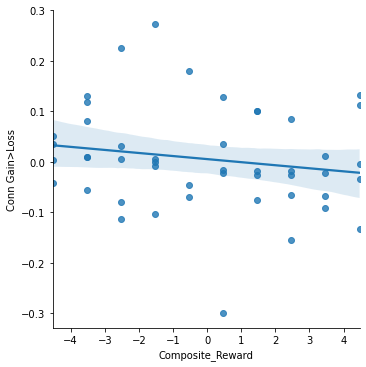

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.05035724141299257 p: 0.7367585386133759


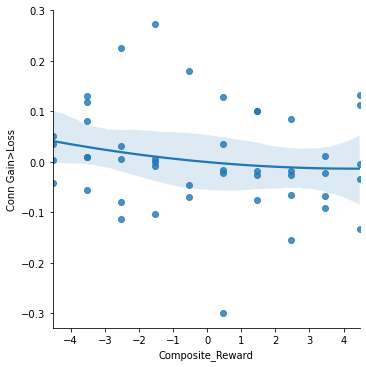

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.035217625866721405 p: 0.8141999532318281


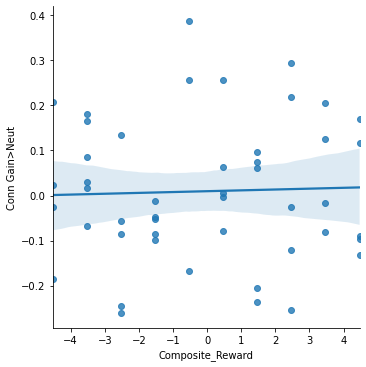

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.008082321233746428 p: 0.9570001842802874


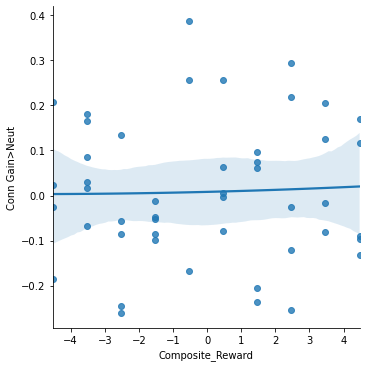

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.13772901929658504 p: 0.35589934472848817


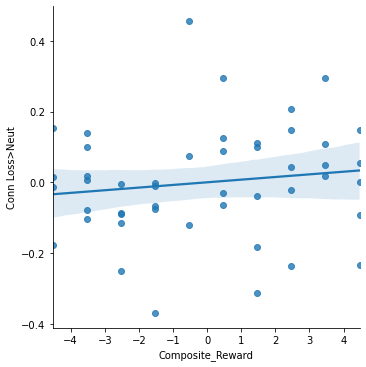

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 -0.006643136741133052 p: 0.9646516113652186


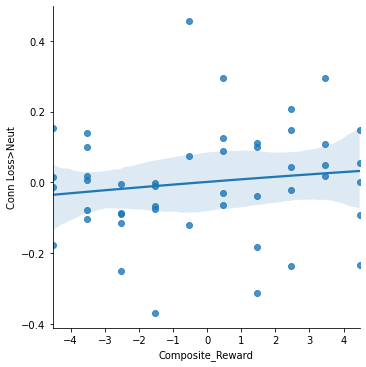

Correlation between Conn Salience and Composite Reward: 
 R^2 -0.03307913052476685 p: 0.8253004895268615


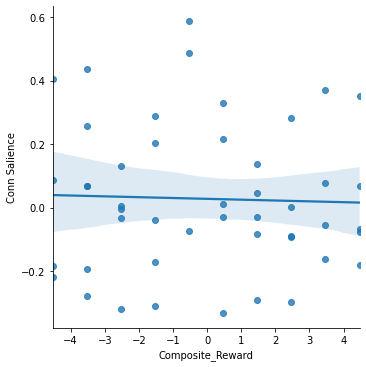

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 -0.03619619395295699 p: 0.8091322453550243


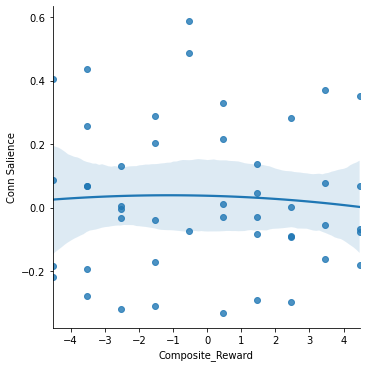

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.15055150058819514 p: 0.3124434260046607


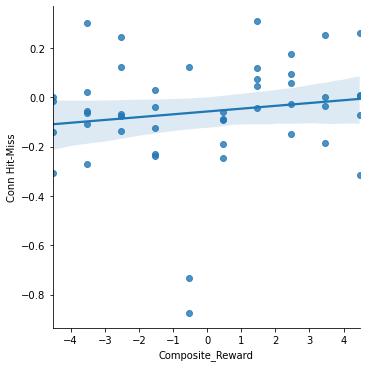

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.13552068512461402 p: 0.36373827077814874


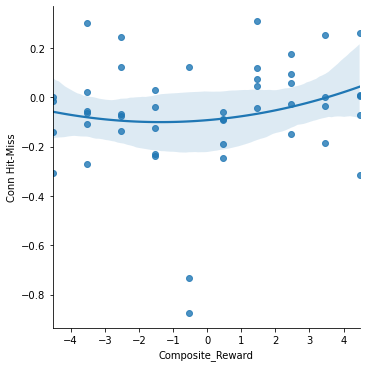

Correlation between Conn LG-SG and Composite Reward: 
 R^2 -0.060651677842819635 p: 0.6854896649958342


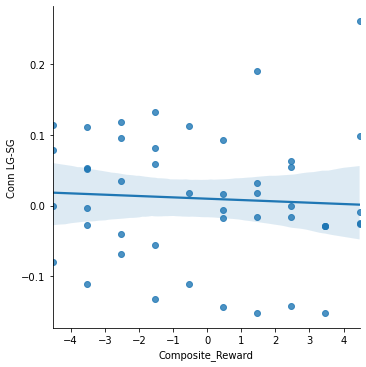

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.11619192588443408 p: 0.4367095252529004


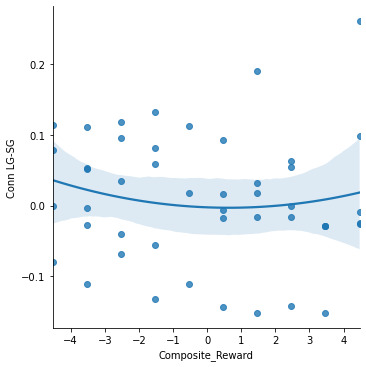

Correlation between Conn LL-SL and Composite Reward: 
 R^2 -0.14778194088362012 p: 0.32153074003738075


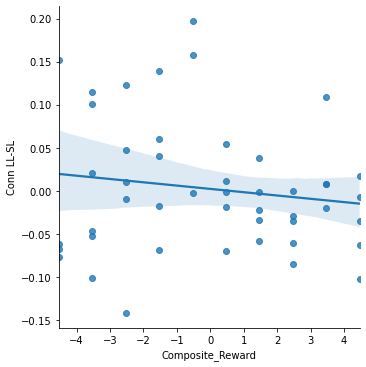

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 -0.2004144603081779 p: 0.17678362761585018


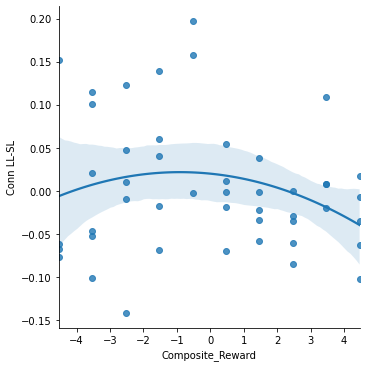

In [11]:
copes=[col for col in big_df.columns if col.startswith('Conn')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df)
    plt.show()
    
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,
               data=big_df,order=2)
    plt.show()

## Interaction with Substance Use


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 -0.17398981882290354 p: 0.24214522523632512


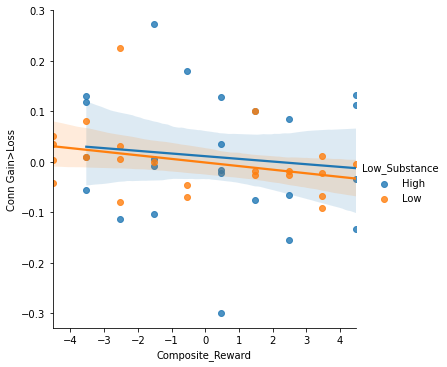

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.05035724141299257 p: 0.7367585386133759


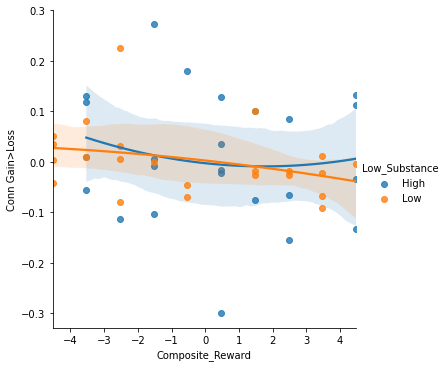

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.035217625866721405 p: 0.8141999532318281


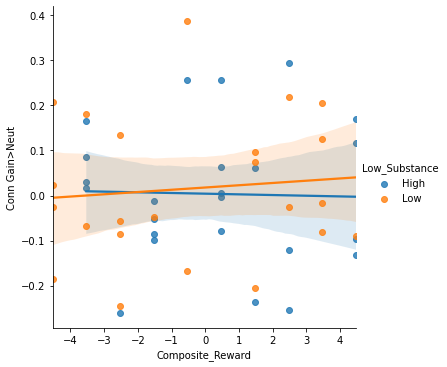

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.008082321233746428 p: 0.9570001842802874


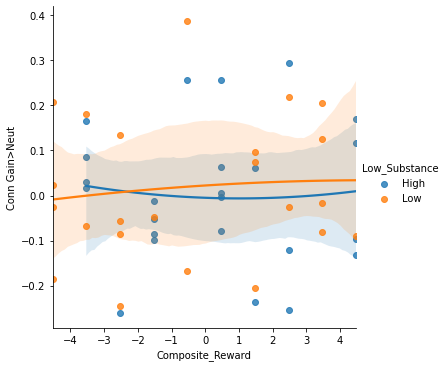

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.13772901929658504 p: 0.35589934472848817


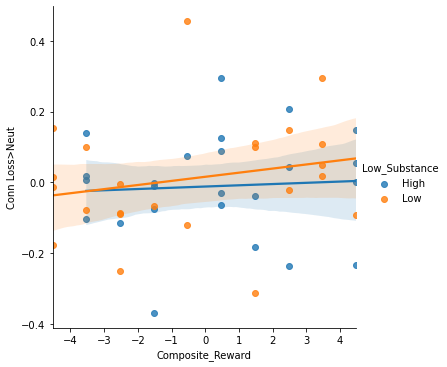

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 -0.006643136741133052 p: 0.9646516113652186


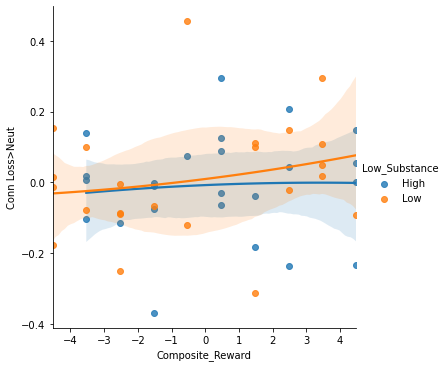

Correlation between Conn Salience and Composite Reward: 
 R^2 -0.03307913052476685 p: 0.8253004895268615


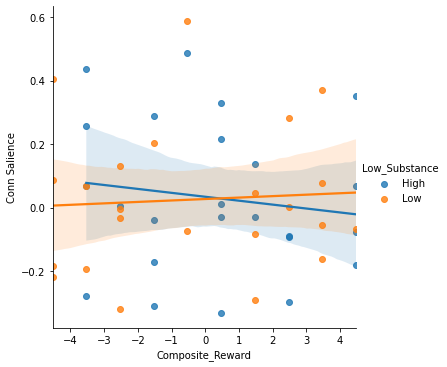

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 -0.03619619395295699 p: 0.8091322453550243


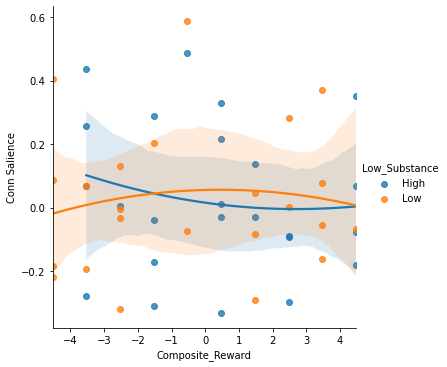

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.15055150058819514 p: 0.3124434260046607


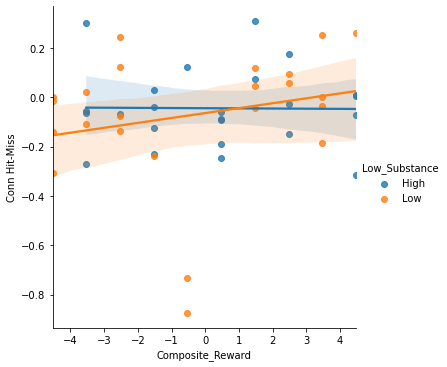

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.13552068512461402 p: 0.36373827077814874


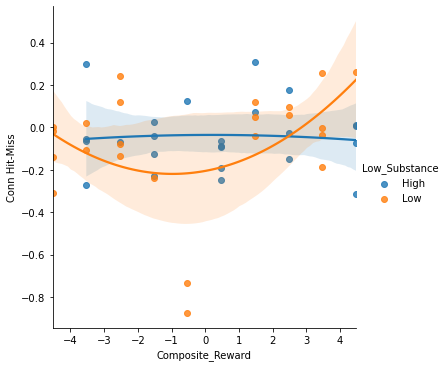

Correlation between Conn LG-SG and Composite Reward: 
 R^2 -0.060651677842819635 p: 0.6854896649958342


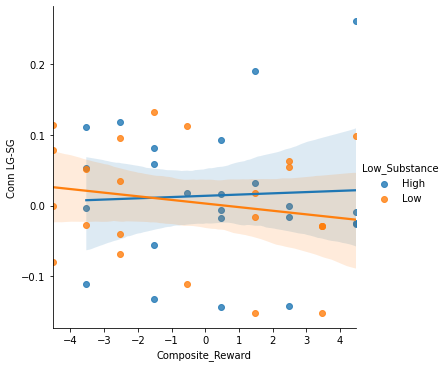

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.11619192588443408 p: 0.4367095252529004


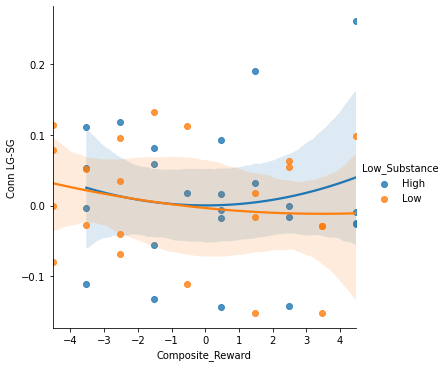

Correlation between Conn LL-SL and Composite Reward: 
 R^2 -0.14778194088362012 p: 0.32153074003738075


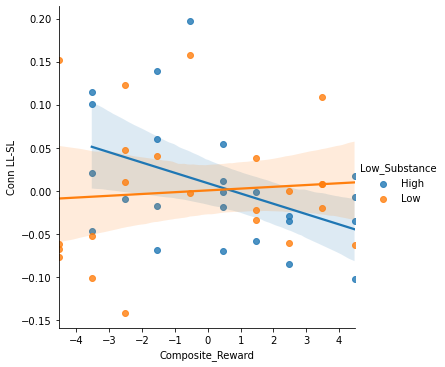

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 -0.2004144603081779 p: 0.17678362761585018


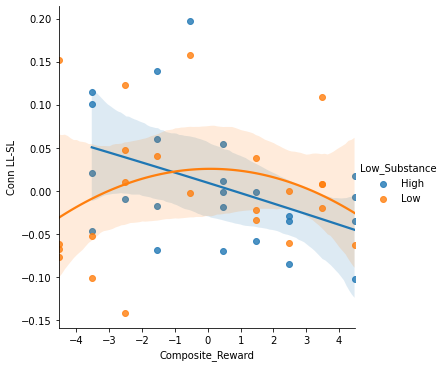

In [12]:
copes=[col for col in big_df.columns if col.startswith('Conn')]
for col in copes:
    r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
    print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df)
    plt.show()
    r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
    print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
    col,r,p))
    sms.lmplot(x='Composite_Reward',y=col,hue='Low_Substance',
               data=big_df,order=2)
    plt.show()

## Other Masks


Mask =../masks/conn_leftVS_LPFC.nii.gz


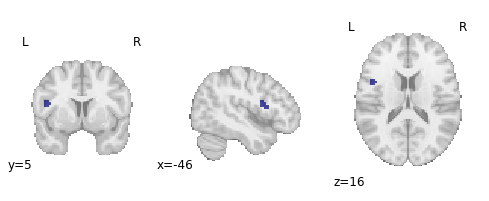

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.066573,0.663372,0.721358,0.565629,-0.611577,-0.091306,0.014734
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-1.423286,-0.326448,1.096838,0.202146,-0.283594,0.014653,-0.136685
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,0.213741,0.217501,-0.113492,0.465292,0.225433,0.137291,0.134469
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.493322,-1.005466,-0.512144,-0.884289,0.490902,0.019303,-0.102959
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.258403,-0.114538,-0.359975,-0.106326,-1.017826,0.177562,-0.092131


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0026301316954596443 p: 0.7320883805966155


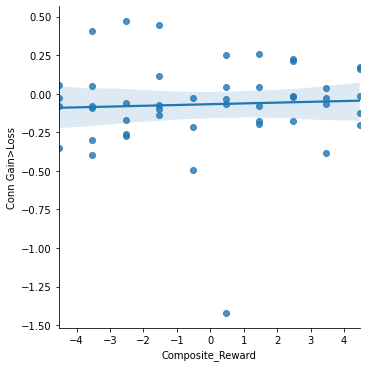

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.00553686487547495 p: 0.6191301691297943


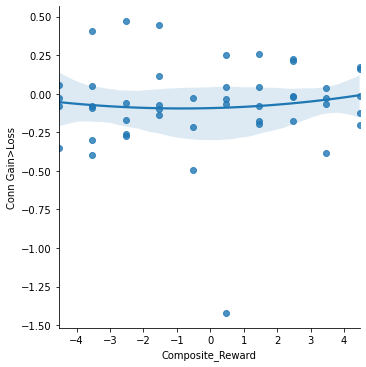

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.0530534094030039 p: 0.11933044596657164


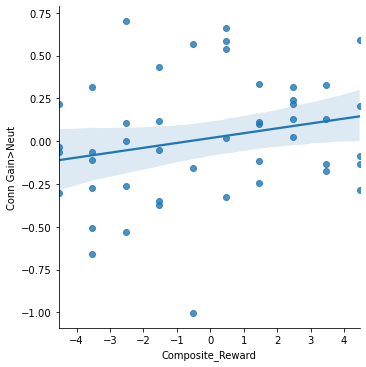

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.01134412376465449 p: 0.4761205083277812


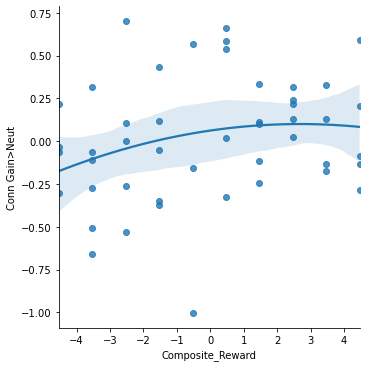

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.020936934546054626 p: 0.3318504317679429


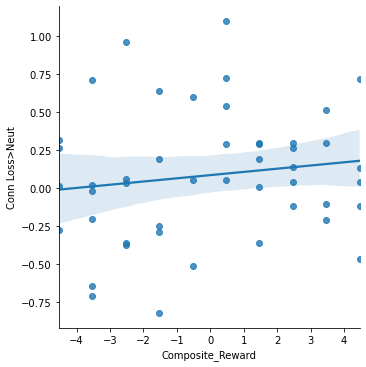

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.01787987010438679 p: 0.37022251959418584


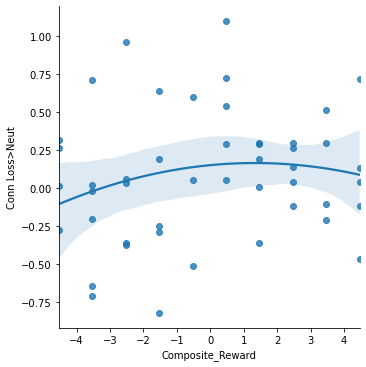

Correlation between Conn Salience and Composite Reward: 
 R^2 5.644286506233752e-05 p: 0.9600273772155046


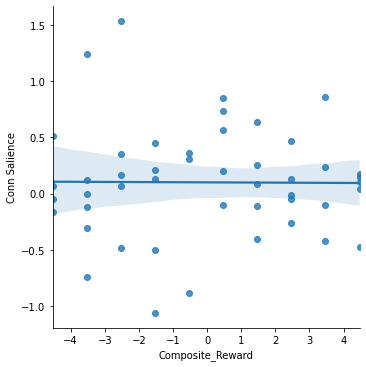

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.0049008149896935015 p: 0.6400802547877315


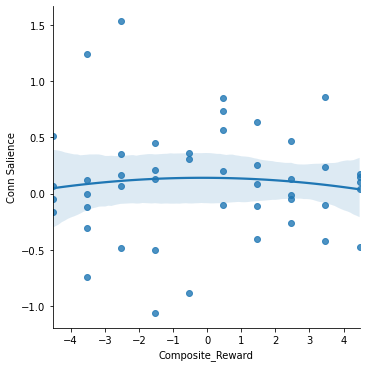

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 2.742546405323459e-05 p: 0.9721307418823188


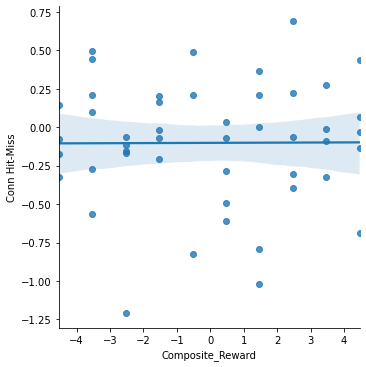

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.012241031308458137 p: 0.4590834948942749


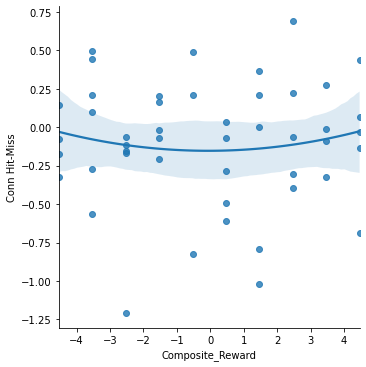

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.03842324567212572 p: 0.1866677186397924


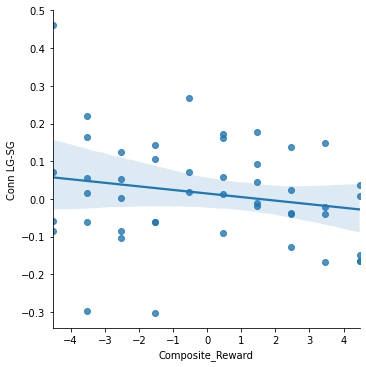

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.01785325224195666 p: 0.3705822045047318


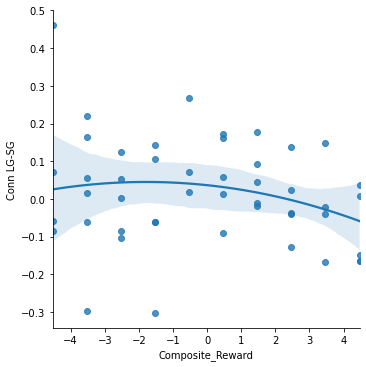

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.02557484300329272 p: 0.2829246689751292


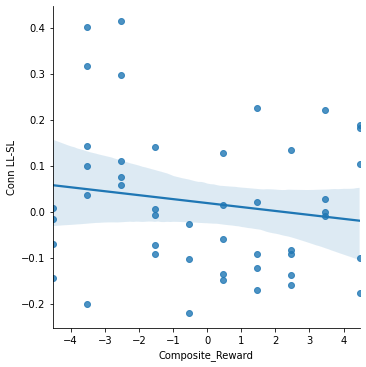

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.02468869876224109 p: 0.29153202562511754


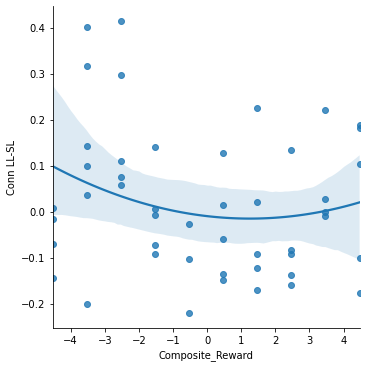

Mask =../masks/conn_leftVS_dACC.nii.gz


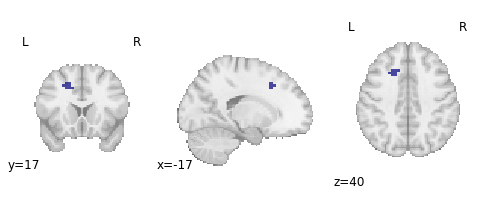

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.134781,-0.437464,-0.294843,-0.342327,-0.273857,0.014912,0.007447
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,0.386109,0.643649,0.257540,-0.181532,0.567561,-0.198913,-0.222505
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,0.026698,-0.198328,-0.322075,-0.620226,0.079851,-0.025588,-0.249342
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,0.170764,0.241916,0.071152,-0.162027,-0.216923,-0.007363,-0.205011
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.111187,0.077451,-0.048930,-0.130854,0.191445,0.016173,-0.122503


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0057573955995653715 p: 0.6122149672229995


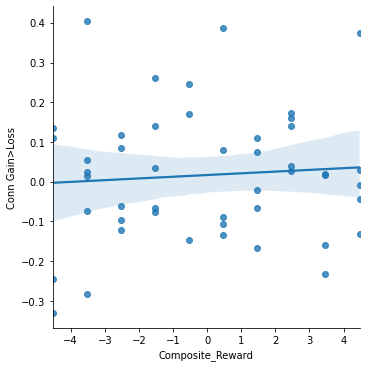

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.02087315303641824 p: 0.33259586156917714


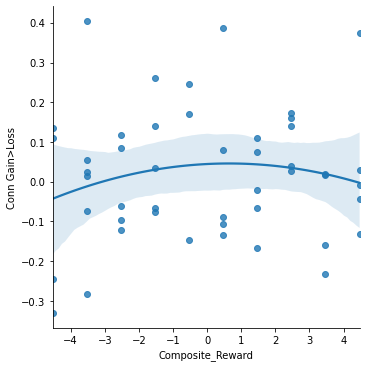

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.02194906194023872 p: 0.32030644718451323


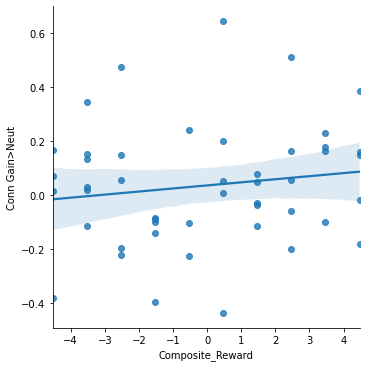

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.014145158862431824 p: 0.4258910096276753


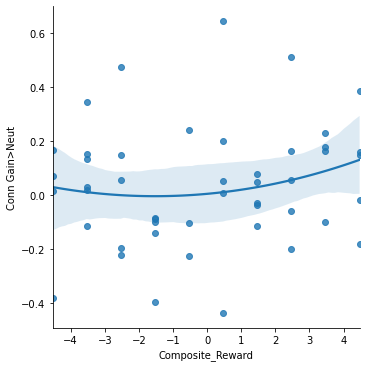

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.0038946565251950713 p: 0.6768774095628376


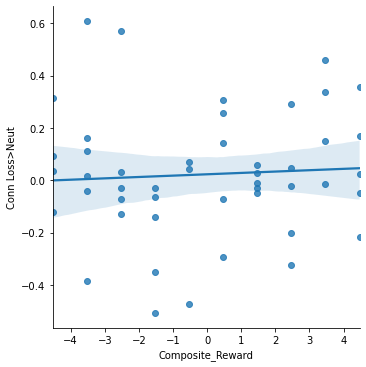

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.05660023810754853 p: 0.10732976550470458


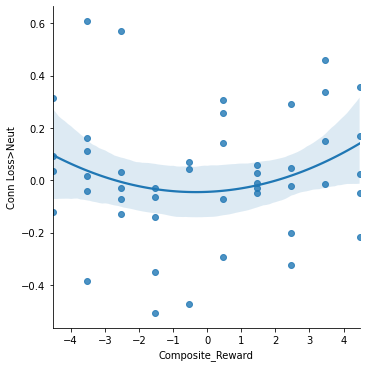

Correlation between Conn Salience and Composite Reward: 
 R^2 0.018350858935944667 p: 0.3639360519073731


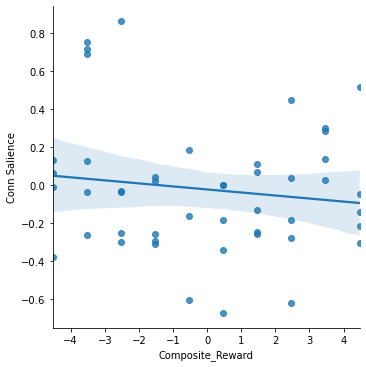

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.06657545010515681 p: 0.07993488840593946


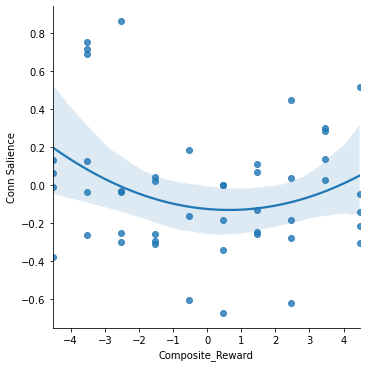

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 1.912501624562943e-05 p: 0.9767257790200986


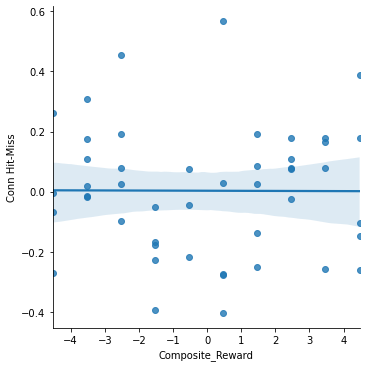

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.026655085615638886 p: 0.27285195169094595


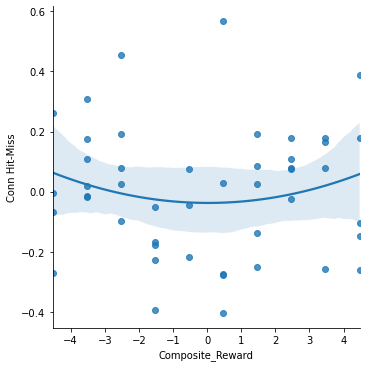

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.021403320640415623 p: 0.3264651896786073


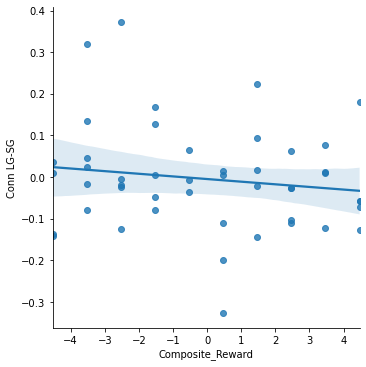

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 6.9969790421774925e-06 p: 0.9859211468528342


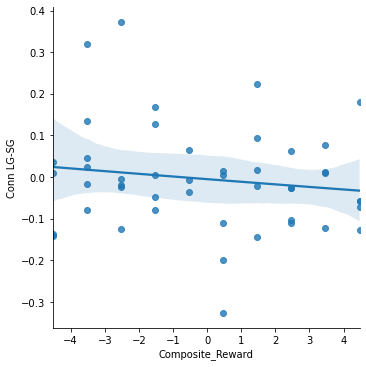

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.025819964952416168 p: 0.28059945991294377


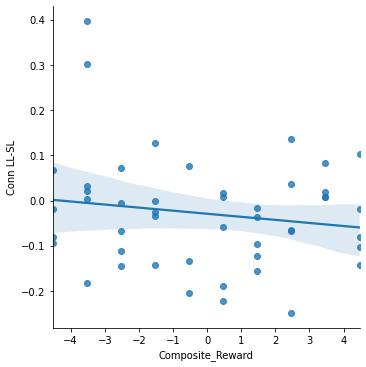

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.041081805187125765 p: 0.171825461689938


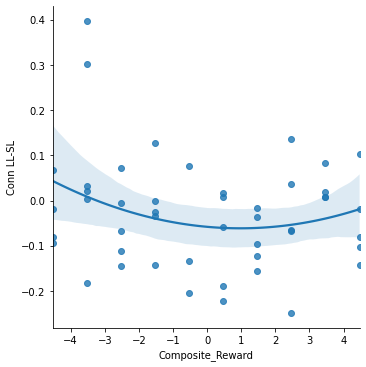

Mask =../masks/conn_rightVS_vPrecun.nii.gz


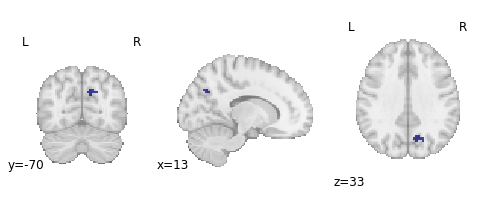

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.053941,0.293786,0.346206,0.335522,0.602894,0.007193,-0.003132
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,0.041964,-1.009608,-1.051572,-2.108909,-0.319504,-0.159032,-0.559847
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.349811,-0.490540,-0.180901,-0.541689,0.364170,-0.167273,-0.030214
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,0.546264,2.698262,2.151998,0.782505,3.808547,-0.847627,-0.247456
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.055104,0.648919,0.591174,0.643719,-0.387177,0.082865,-0.072944


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0910953013421857 p: 0.03922567495564626


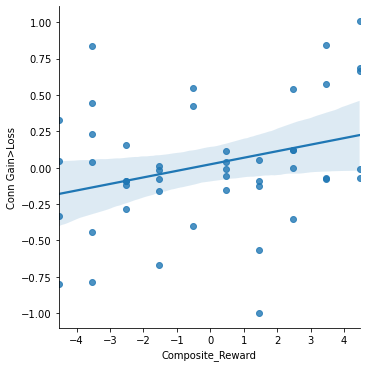

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.060524282299622124 p: 0.09553046054161374


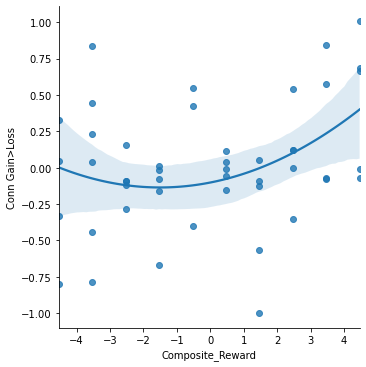

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.013063224687725986 p: 0.4442859703847264


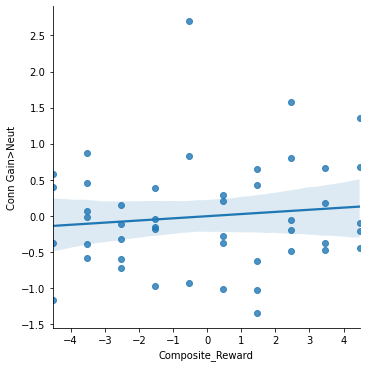

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.003774388007290122 p: 0.6816366978900577


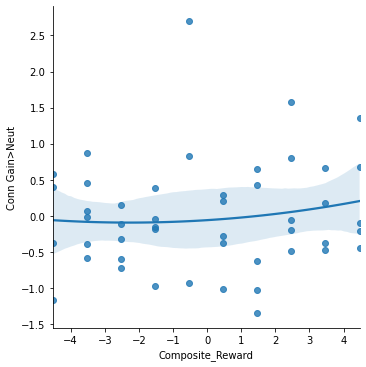

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.009921961888713075 p: 0.5053110876568676


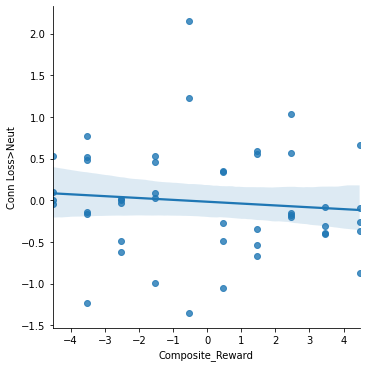

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.003623213103018544 p: 0.6877457992883943


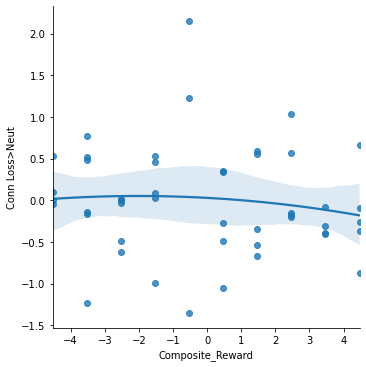

Correlation between Conn Salience and Composite Reward: 
 R^2 0.0003886947476329964 p: 0.8953523399414921


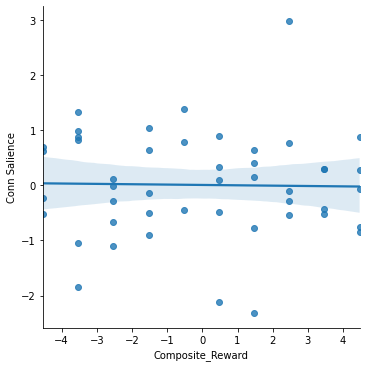

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.0008188534594684998 p: 0.8485763947139208


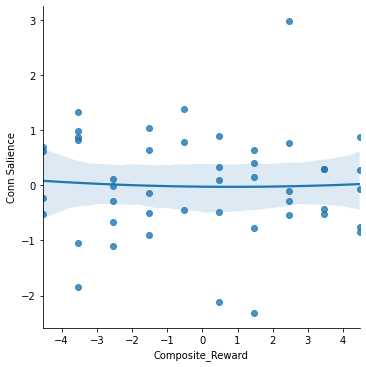

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.042735401941233285 p: 0.16326095421226394


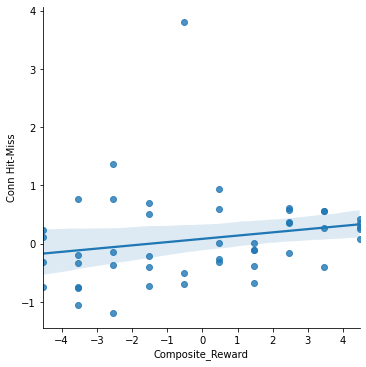

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.008231518580313615 p: 0.5441815115226005


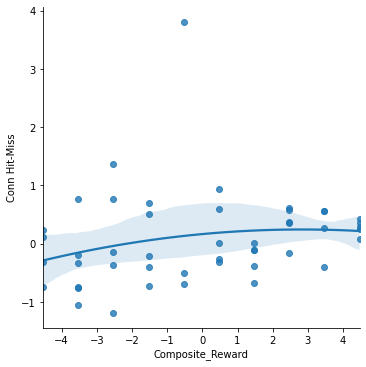

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.0008865583882674104 p: 0.8425167554941504


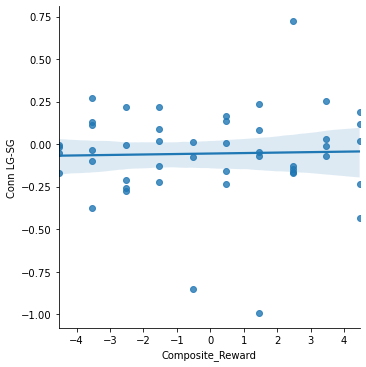

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.0074526995640596 p: 0.5639503033618047


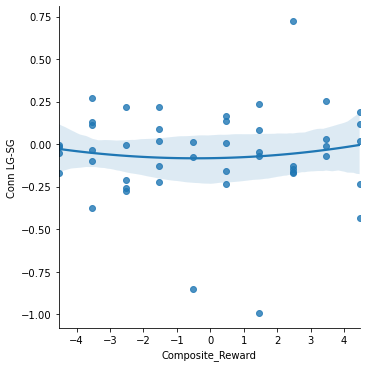

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.011695162936841438 p: 0.46933518431818283


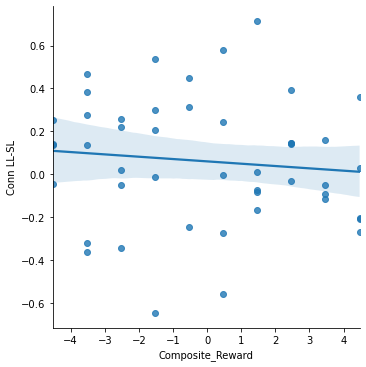

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.004003195032616193 p: 0.6726554485057943


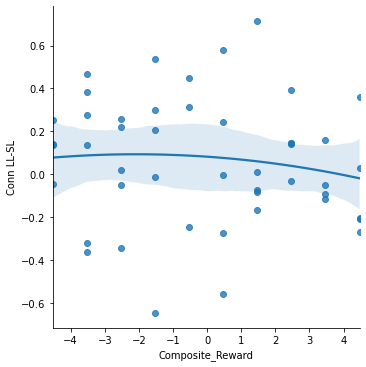

Mask =../masks/conn_rightVS_dPrecun.nii.gz


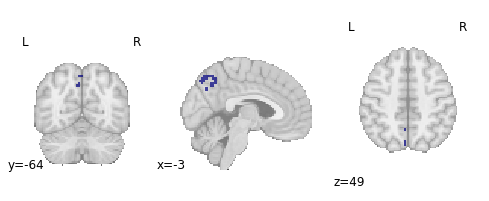

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.243356,-0.473199,-0.238668,-0.651644,-0.069766,0.026631,-0.232891
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.424117,0.020155,0.444272,-0.044212,-0.316791,-0.037544,-0.146739
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.228176,-0.300085,-0.156989,-0.961712,0.920373,-0.216644,-0.279032
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.680649,-1.053782,-0.373132,-0.539589,0.995080,0.324773,-0.208861
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.135514,0.939591,0.825042,0.021522,0.792192,-0.505336,-0.069690


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.021901630384142397 p: 0.320835740171107


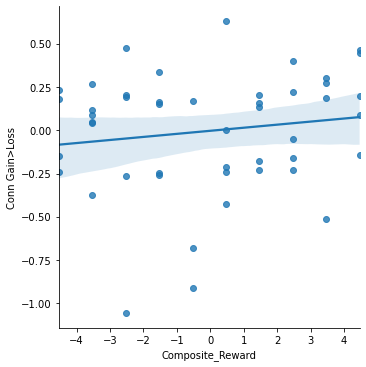

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.0540006557499105 p: 0.11599137331058089


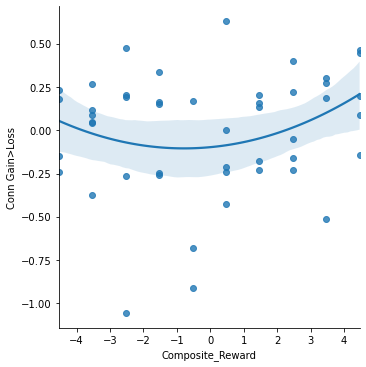

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.010010079107266114 p: 0.5034170777013698


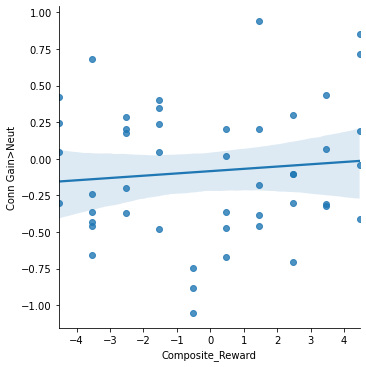

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.08462463620799902 p: 0.04728238893968088


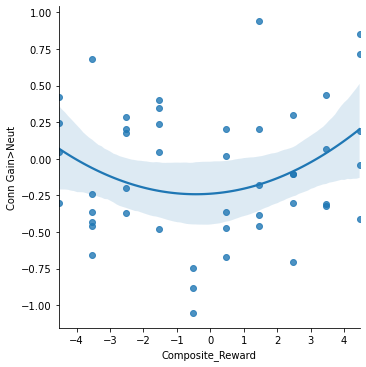

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.0034099317200822063 p: 0.6966206084994562


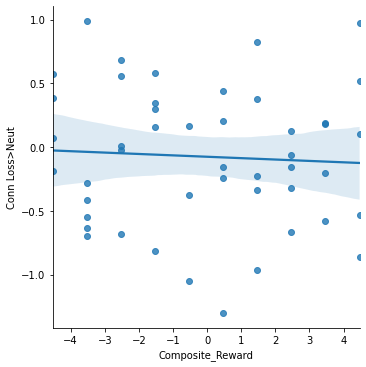

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.01649244468531434 p: 0.38963160069041036


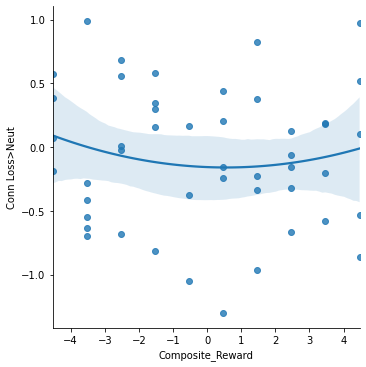

Correlation between Conn Salience and Composite Reward: 
 R^2 0.007552424755112131 p: 0.5613442168693284


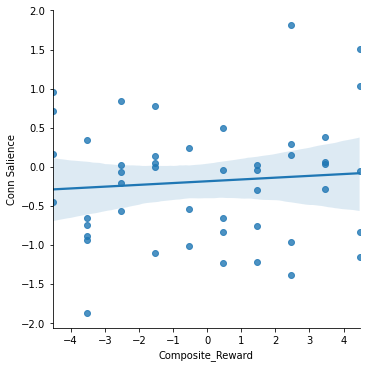

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.035058064029701866 p: 0.20757772352749745


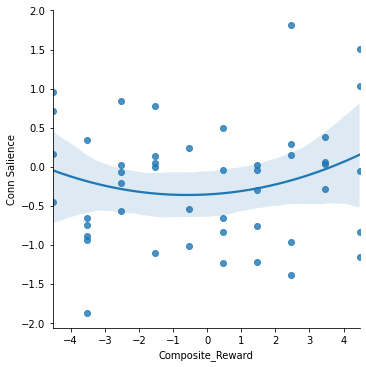

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.0035337979504266553 p: 0.6914287833542739


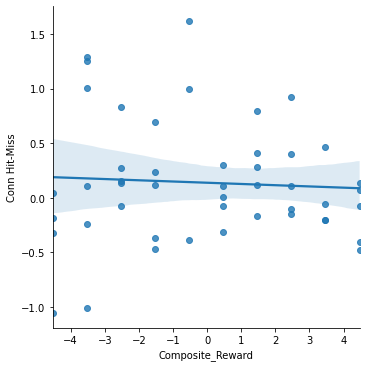

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.07736148264899723 p: 0.05835479755670879


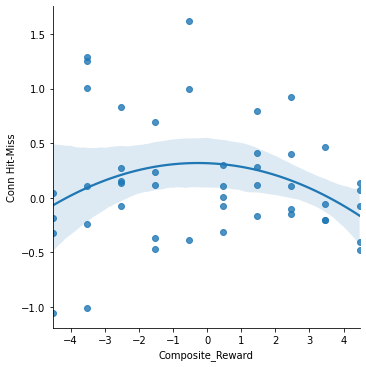

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.0017377931993643812 p: 0.7808466411622024


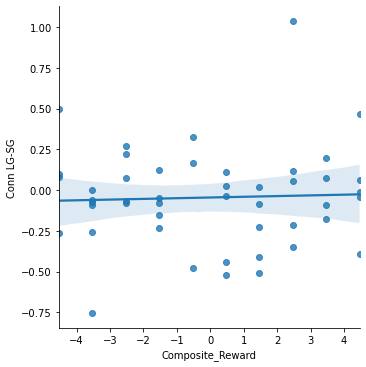

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.023929288556268555 p: 0.29916930610288356


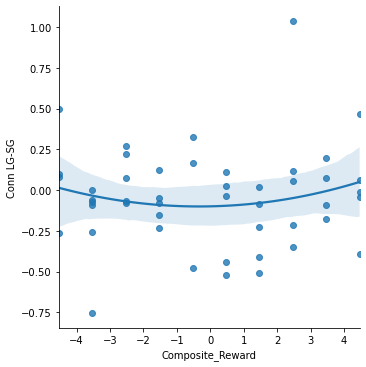

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.023324048189462786 p: 0.30543675214982335


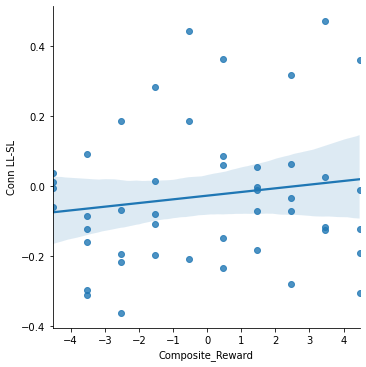

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.012182197218360434 p: 0.46017147490069393


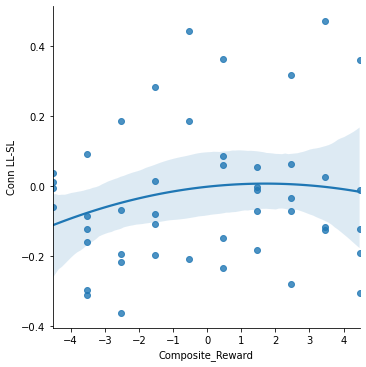

Mask =../masks/conn_rFPN_VLPFC.nii.gz


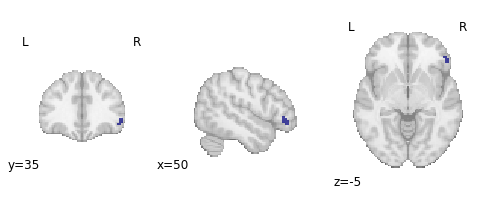

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,0.145119,0.474514,0.342892,0.701506,-0.040096,-0.252977,0.432119
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-1.644234,0.013296,1.657530,2.612074,0.320128,0.242771,0.941669
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.029303,-0.105966,-0.068073,0.005343,0.215306,0.170145,-0.061421
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,0.244931,0.572842,0.327911,1.275855,-1.138664,0.415654,0.134665
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.340130,0.583940,0.231066,0.886785,0.806955,0.371499,-0.031350


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.013370213313516082 p: 0.4389471727006155


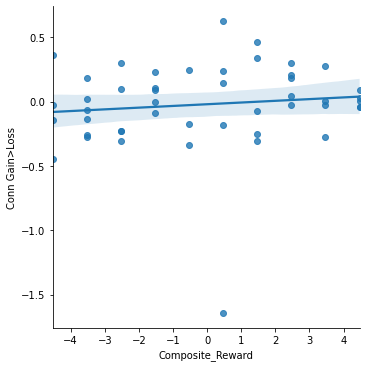

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 3.867052885725777e-06 p: 0.9895332514820107


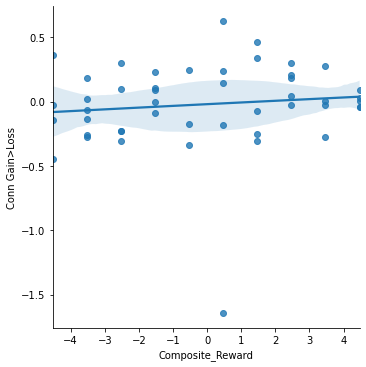

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.11583278259493023 p: 0.01924262556011546


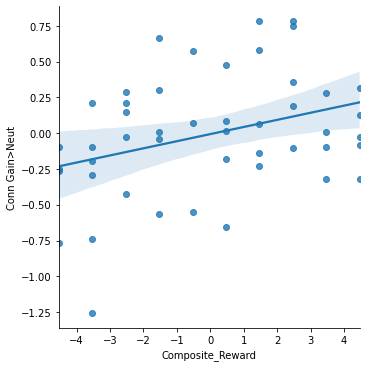

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.07738824293214765 p: 0.05830947252385658


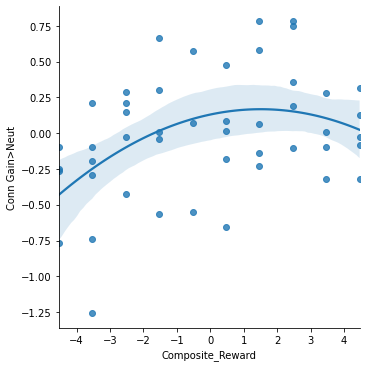

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.06746229311014945 p: 0.07788309838153275


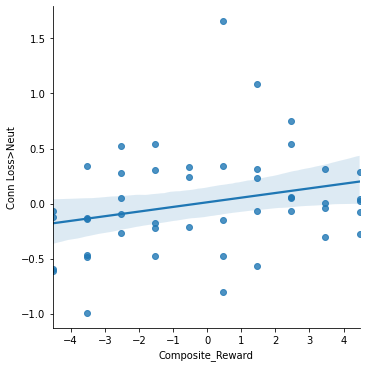

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.07365423518195063 p: 0.0649970617772244


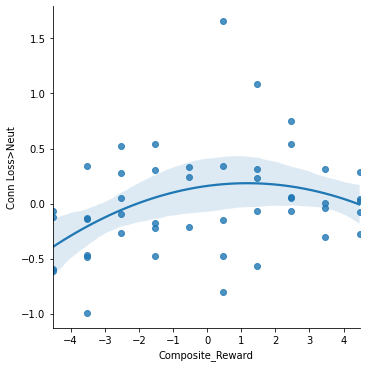

Correlation between Conn Salience and Composite Reward: 
 R^2 0.06494319081933944 p: 0.08385977832569688


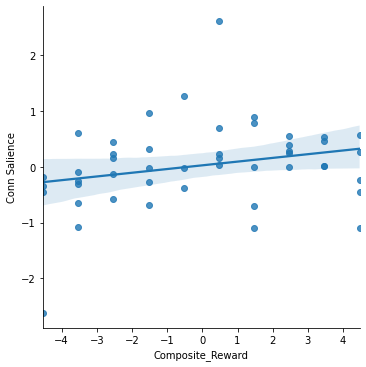

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.15899716343853104 p: 0.005499595003966519


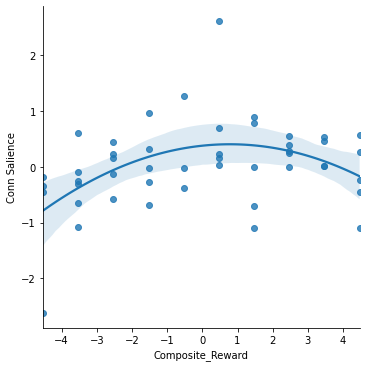

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.0004718933433557207 p: 0.8847638521356274


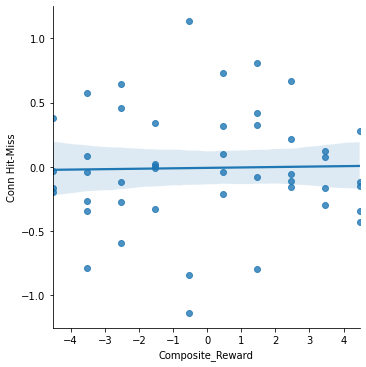

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.017104289335726715 p: 0.38090275062800233


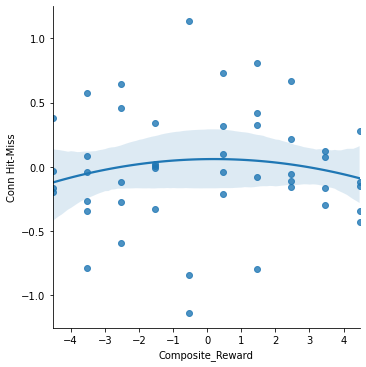

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.04162322090876483 p: 0.16896748554177032


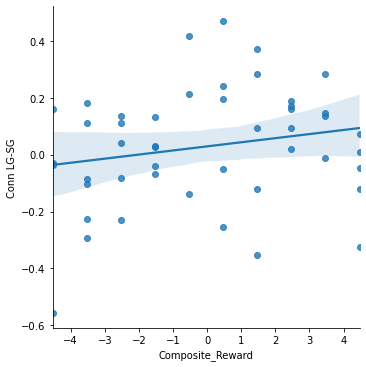

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.10905070812706387 p: 0.023391491629167413


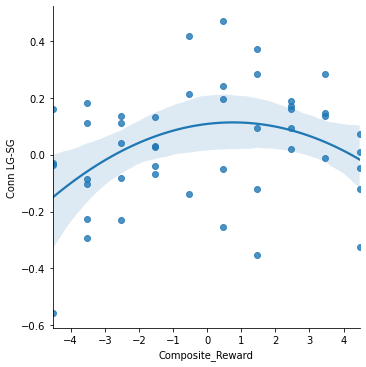

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.0011189225673115652 p: 0.8233713305939752


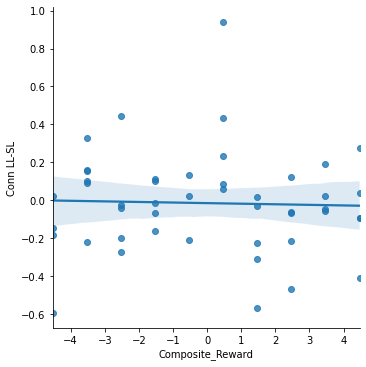

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.03471057253410878 p: 0.20988549667232728


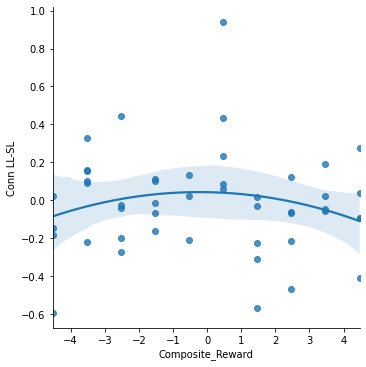

Mask =../masks/conn_rightVS_dACC.nii.gz


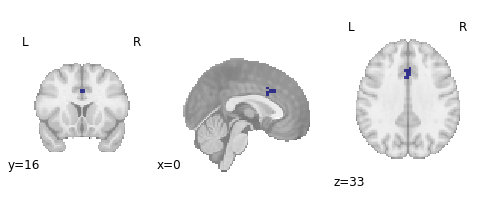

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.389643,-0.254268,0.124599,-0.445922,-0.408693,-0.129302,-0.129134
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.353217,-0.024155,0.329063,1.417827,-0.745640,-0.485315,1.328897
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.181996,-0.997005,-0.851994,-1.744463,-0.065861,-0.250595,-0.285428
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.185208,0.295336,0.480544,0.496597,-1.397243,-0.083319,0.155757
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.156856,1.133577,0.980744,1.000252,-0.323107,0.431348,-0.460419


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0646481022935332 p: 0.08459053870726835


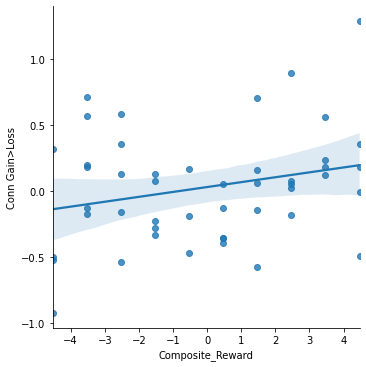

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.01745658078618626 p: 0.3759996082500132


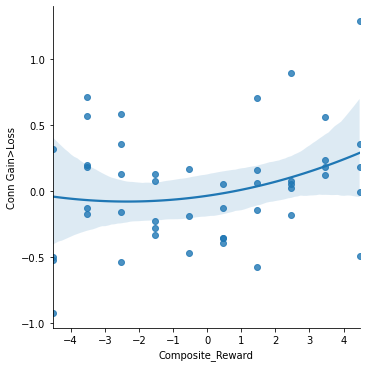

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.005035380947923669 p: 0.6355151469255939


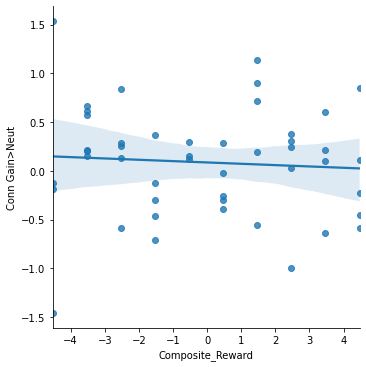

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.0003217903031450916 p: 0.9047380386469837


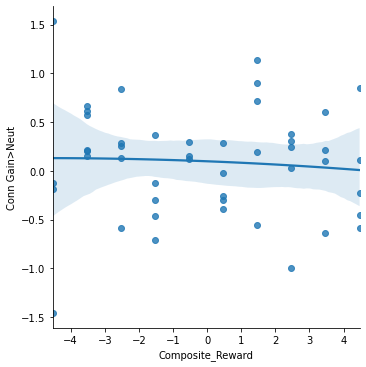

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.11390555571682666 p: 0.02034074932361379


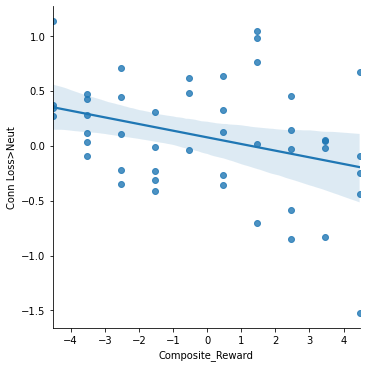

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.004514354712877436 p: 0.6536276130933057


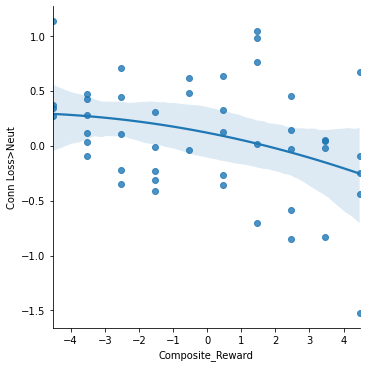

Correlation between Conn Salience and Composite Reward: 
 R^2 0.05819975860351368 p: 0.10234402782667112


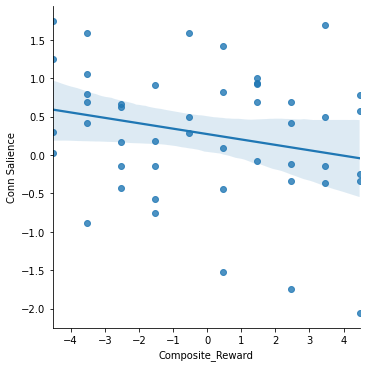

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.0004946832997113599 p: 0.8820332337425539


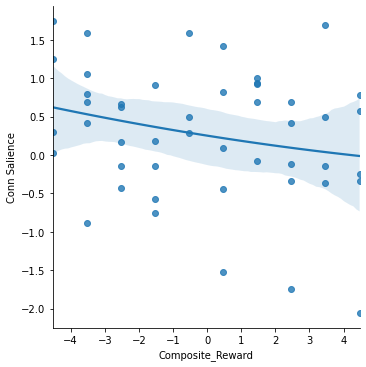

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.0034009872895639118 p: 0.696999675991353


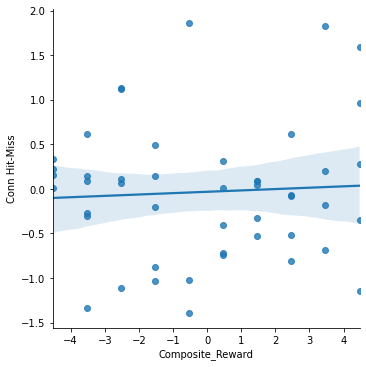

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.045085029402405497 p: 0.15189306641114456


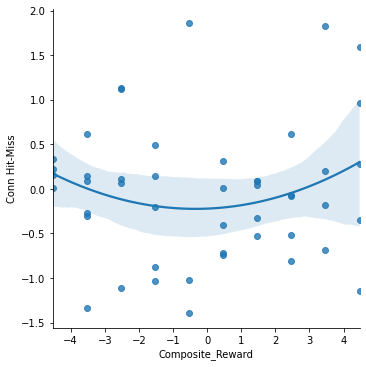

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.03444600014631909 p: 0.21166240740377318


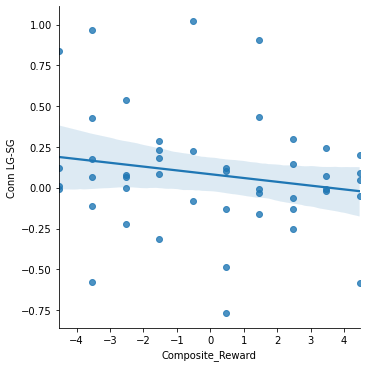

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.0004613624719655003 p: 0.8860483448879691


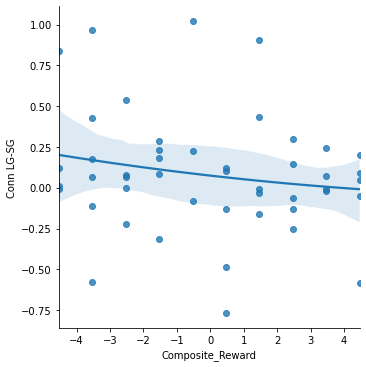

Correlation between Conn LL-SL and Composite Reward: 
 R^2 4.6864090145909296e-05 p: 0.9635742904526998


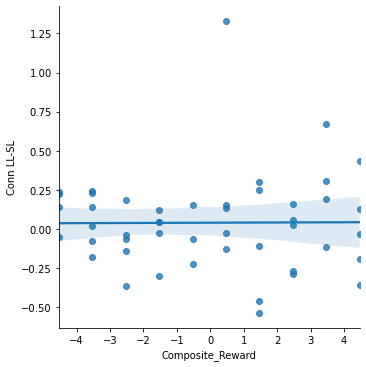

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.004389155102091739 p: 0.6581648667232106


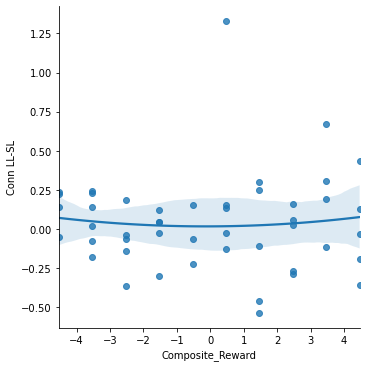

Mask =../masks/conn_rightVS_VMPFC_cov.nii.gz


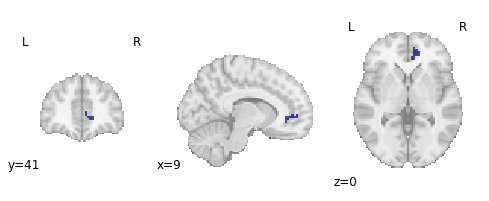

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,0.325900,0.417722,0.086179,0.564512,-0.128956,0.126383,0.069798
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.322671,-0.579285,-0.256614,1.197476,0.507882,0.348249,0.728702
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.015981,-1.661418,-1.729907,-2.526471,0.745294,-0.419065,-0.211975
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.208669,-0.161360,0.047309,0.189849,0.271880,0.236884,-0.072301
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.003402,-0.497927,-0.521354,0.000619,-0.069051,-0.003021,0.334690


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.010176001413686103 p: 0.4998829549418145


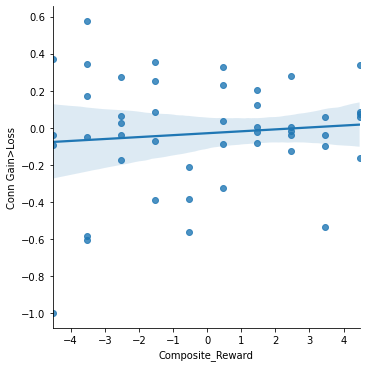

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.0009204774656188065 p: 0.8395712570866037


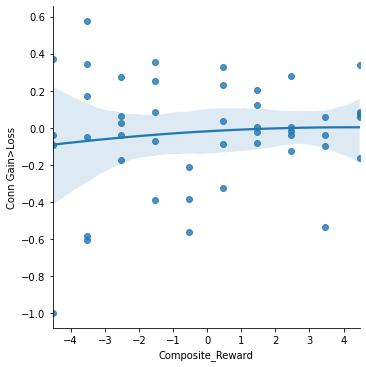

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.0031880425151822314 p: 0.7061983392730735


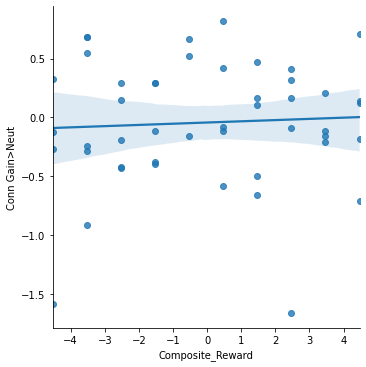

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.01693912576925117 p: 0.38323198417486454


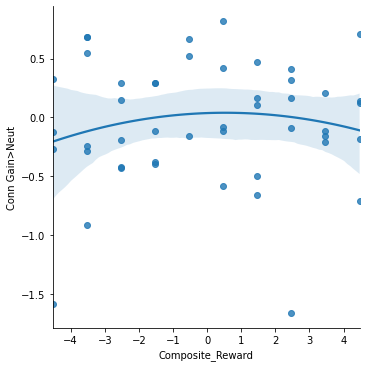

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 3.193853862989165e-05 p: 0.9699259518053926


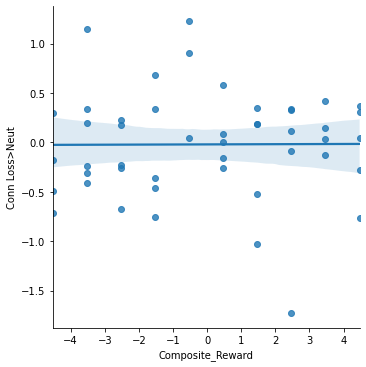

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.012261419933542381 p: 0.45870739627593804


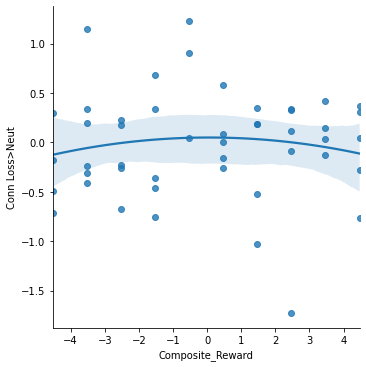

Correlation between Conn Salience and Composite Reward: 
 R^2 0.004524344329777383 p: 0.6532688395494601


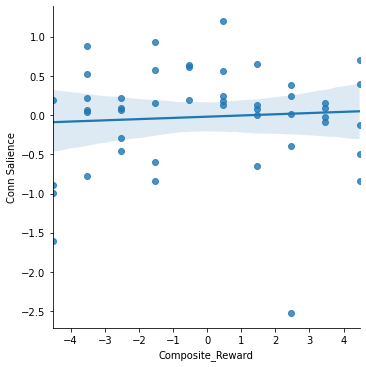

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.09172338441518148 p: 0.03852171232695624


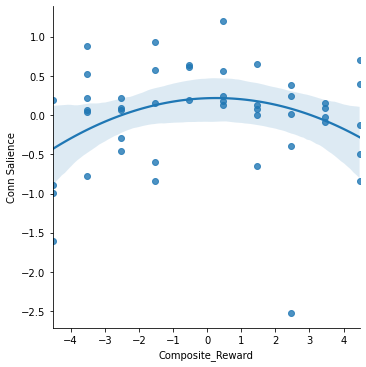

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.009886145129232499 p: 0.5060843829876485


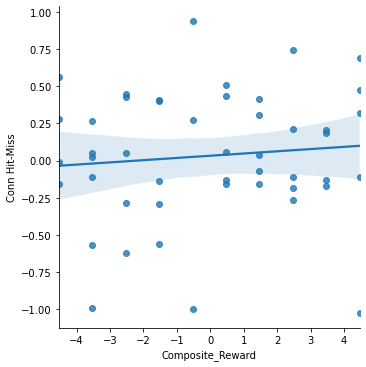

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.0006014505223491788 p: 0.8700235620794219


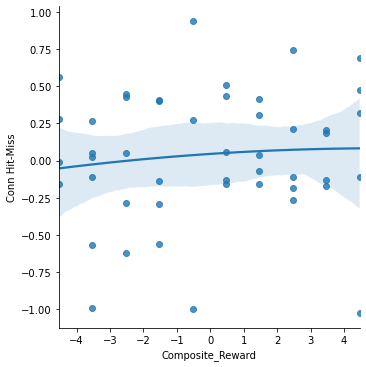

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.01771528392615973 p: 0.37245424216987444


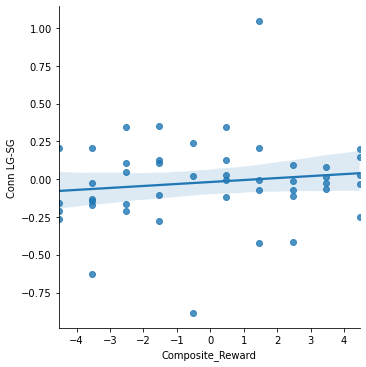

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.012771882409191476 p: 0.44944450155732163


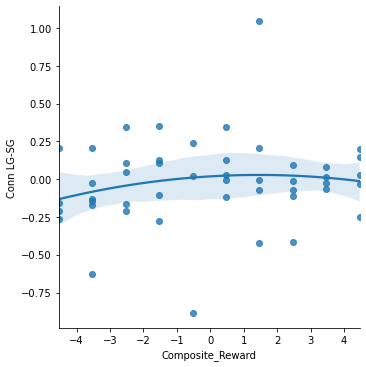

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.015183617328454857 p: 0.40927499819373075


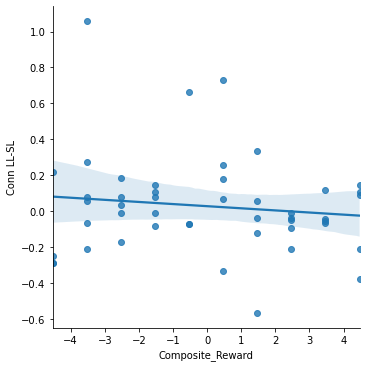

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.029207810278772874 p: 0.25073088342978067


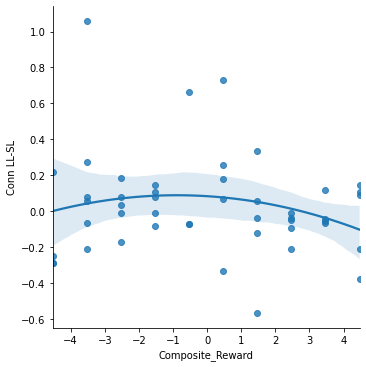

Mask =../masks/conn_rightVS_DLPFC_cov.nii.gz


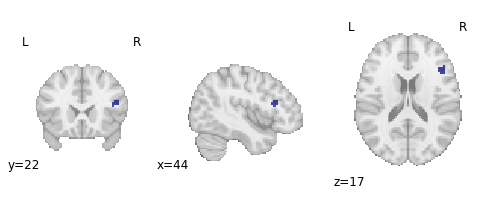

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,0.194698,0.546762,0.353513,0.419696,-0.442638,-0.195218,0.166194
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.538006,0.173942,0.711948,0.857707,-0.708884,0.167147,0.109361
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.762941,-0.714070,-0.122572,-1.019209,-0.071761,0.133275,-0.491928
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,0.092210,-0.628444,-0.720655,-1.879376,-0.259471,-0.879177,0.075959
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.253325,0.855910,0.602791,0.927041,-0.251083,-0.108806,0.237448


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.015872262247840604 p: 0.3987685029088912


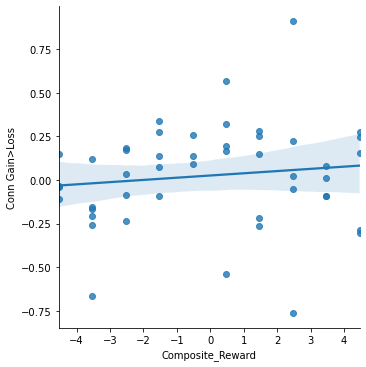

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.04945639225956545 p: 0.13298189835848725


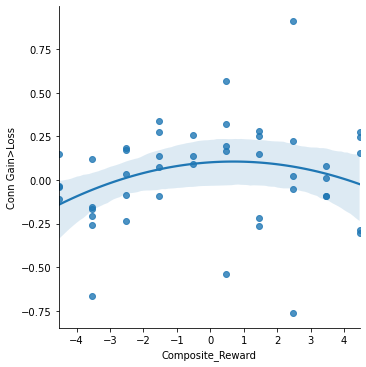

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.023704521797171987 p: 0.3014777442535817


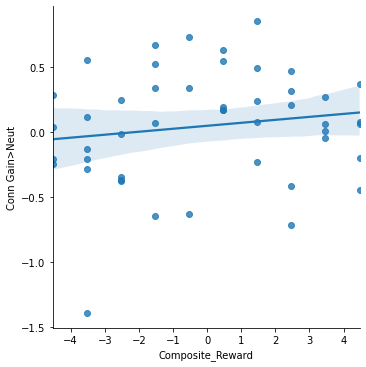

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.06932467529631793 p: 0.07375045948186486


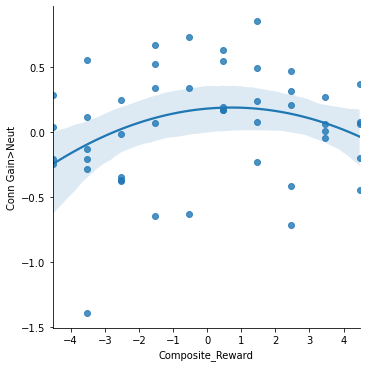

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.007229301870555789 p: 0.5698730379823642


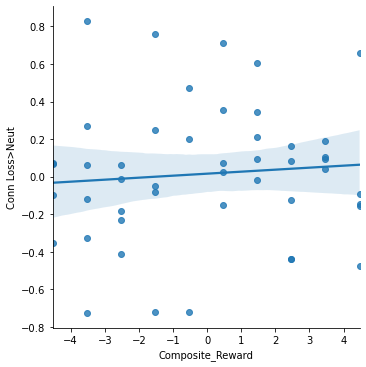

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.021830951137277853 p: 0.32162654673406466


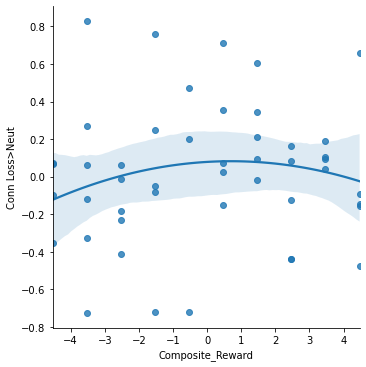

Correlation between Conn Salience and Composite Reward: 
 R^2 0.0038418931931036276 p: 0.6789546690421379


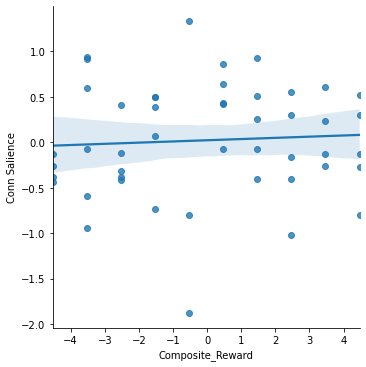

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.02167970291789092 p: 0.3233272696808454


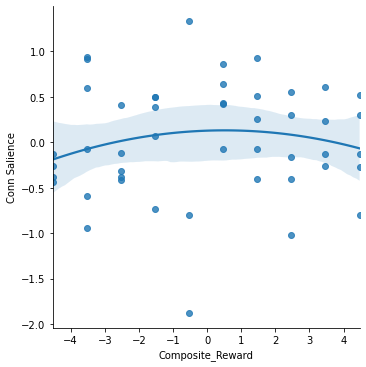

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 1.2260271663906949e-06 p: 0.9941064089070637


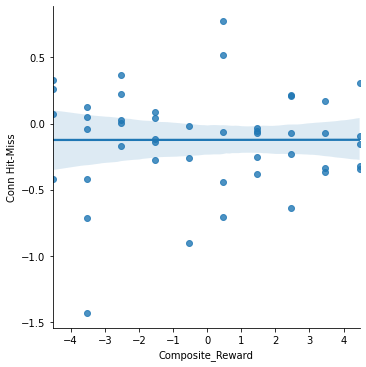

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 6.455713894756296e-07 p: 0.9957233481411718


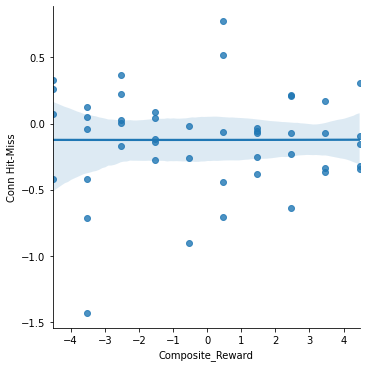

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.005894991328477154 p: 0.6079837523741275


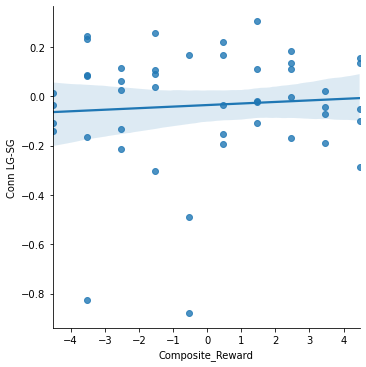

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.00014144246257669166 p: 0.9367612026205143


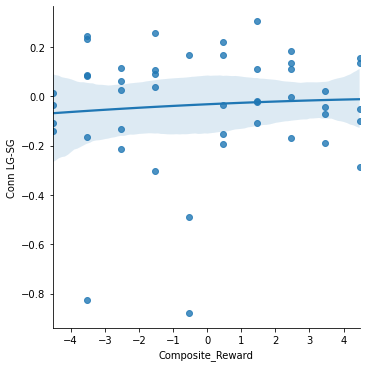

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.02059289819522452 p: 0.3358973062206866


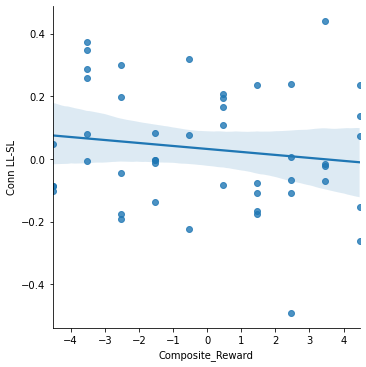

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.00036556575596868597 p: 0.8984967874890845


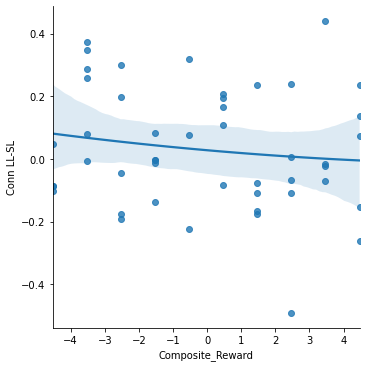

Mask =../masks/conn_leftVS_visual.nii.gz


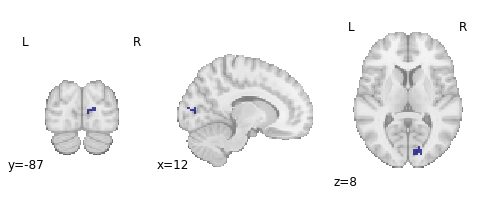

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,0.182698,-0.104878,-0.285469,-0.241928,0.200070,0.089210,-0.104817
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,-0.474499,-1.540918,-1.066419,-2.259661,-0.338010,-0.846845,0.209516
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,-0.083536,-0.588623,-0.528006,-1.271597,0.428916,-0.275234,-0.192074
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,0.824703,1.563956,0.739253,1.871468,-0.090693,0.285952,0.193957
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,-0.084754,0.778593,0.863309,1.177978,0.276794,0.189180,0.038802


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.07173629082086994 p: 0.06873416249189443


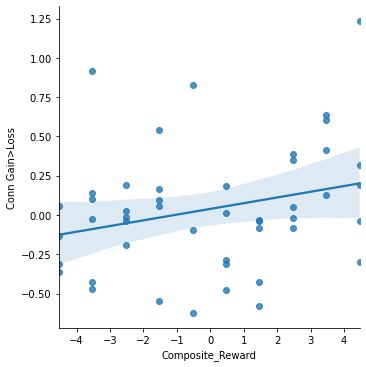

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.0364710441553275 p: 0.19848883566110992


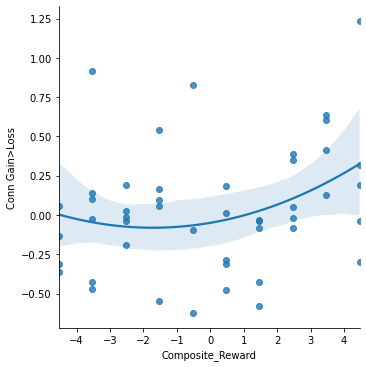

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.006247056346024715 p: 0.5974328308391214


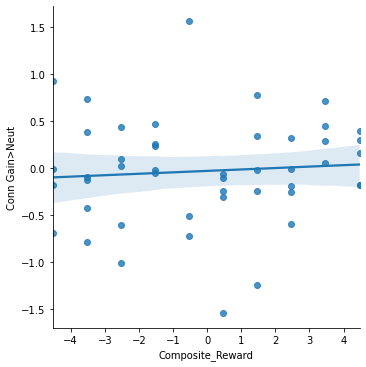

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.021346080729241823 p: 0.32711998614367305


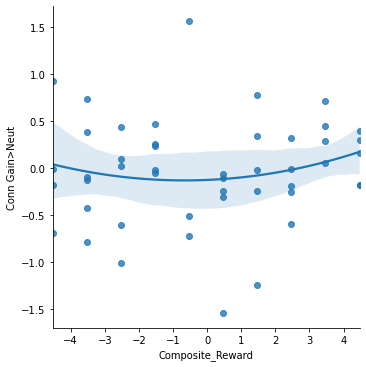

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.01897449394572334 p: 0.3558326430790145


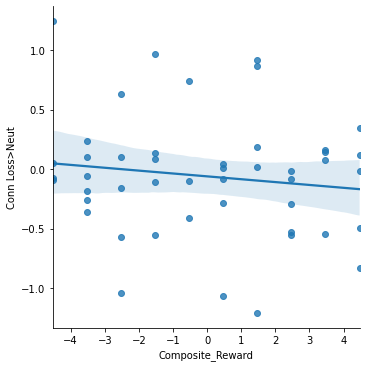

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.0018906356746207719 p: 0.7716601466612318


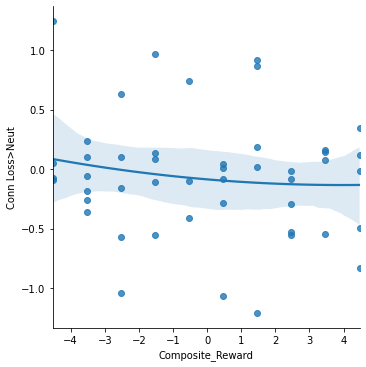

Correlation between Conn Salience and Composite Reward: 
 R^2 0.0035953047826447777 p: 0.6888896452526996


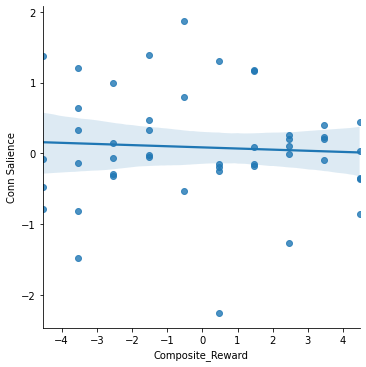

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.024685868327565606 p: 0.2915600356711564


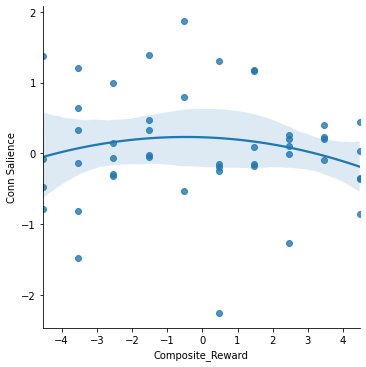

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.0066582198428582935 p: 0.5855786710464509


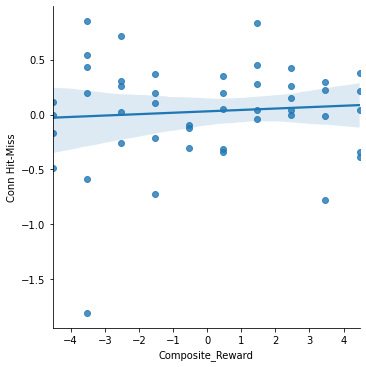

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.01407761910837463 p: 0.4270057599613001


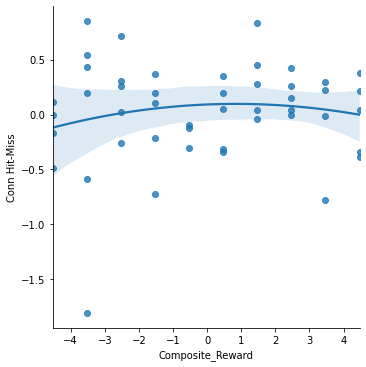

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.0007979036483651618 p: 0.8505036297113885


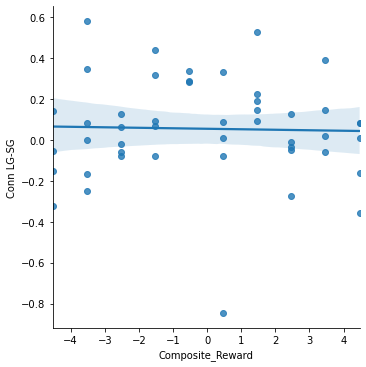

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.05636806722751662 p: 0.10807459539470271


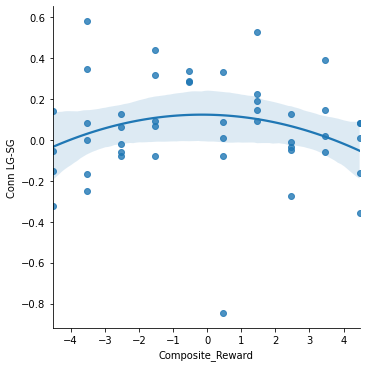

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.00043183372524915843 p: 0.889732004662637


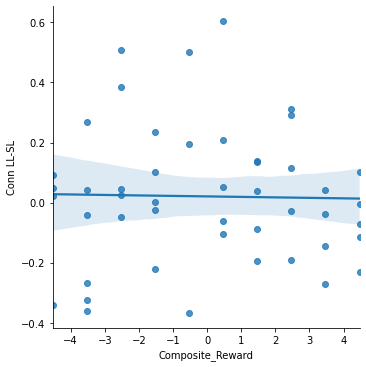

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 0.08756886433628353 p: 0.04342691187919422


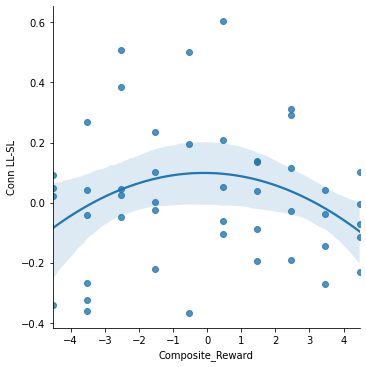

Mask =../masks/conn_rFPN_precun.nii.gz


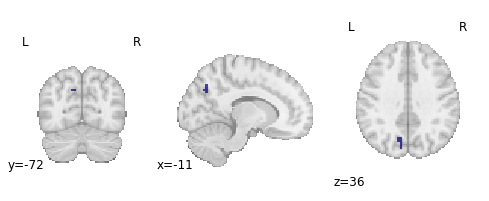

,Subject,Fnames-act,Ones,Composite_Substance,Composite_Reward,Composite_Reward_Squared,tsnr,fd_mean,Composite_SubstanceXReward,Composite_SubstanceXReward_Squared,Conn Gain>Loss,Conn Gain>Neut,Conn Loss>Neut,Conn Salience,Conn Hit-Miss,Conn LG-SG,Conn LL-SL
0,sub-1001,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.534825,0.469388,-8.028738,-0.379745,0.030117,-0.191576,3.342227,-0.175803,0.029669,0.191727,0.051371,0.988184,0.294272,-0.346517
1,sub-1003,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,0.044818,0.469388,-8.028738,-0.114737,0.105981,-0.421580,3.234266,0.708834,-0.592245,-1.301079,-1.875317,0.520331,-0.349127,-0.269976
2,sub-1004,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-0.249186,2.469388,-2.151187,-0.076754,-0.474856,-1.057953,1.704889,0.106578,-0.473363,-0.589493,-0.737682,0.324343,-0.174424,-0.005808
3,sub-1006,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,-0.530612,-7.967514,1.360129,-0.870765,0.157611,2.905903,-0.019167,1.647292,1.666459,1.110436,2.825164,-0.317964,-0.046329
4,sub-1009,/data/projects/istart-mid/derivatives/fsl/sub-...,1.0,-1.131198,1.469388,-6.089963,1.238442,0.036518,-2.104785,0.782022,0.188884,0.745349,0.580727,1.043533,-0.087037,-0.054652,0.292163


Correlation between Conn Gain>Loss and Composite Reward: 
 R^2 0.0004807388698798832 p: 0.8836961847072441


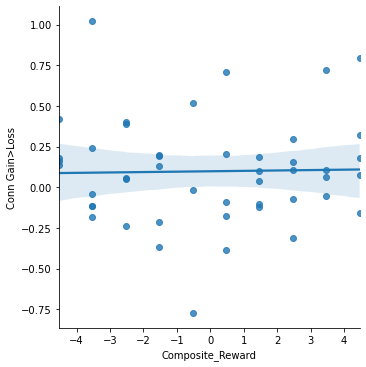

Correlation between Conn Gain>Loss and Squared Composite Reward: 
 R^2 0.07668195167213007 p: 0.05951793547493057


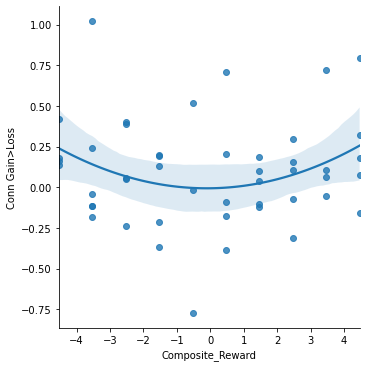

Correlation between Conn Gain>Neut and Composite Reward: 
 R^2 0.01741042200380194 p: 0.3766370609224094


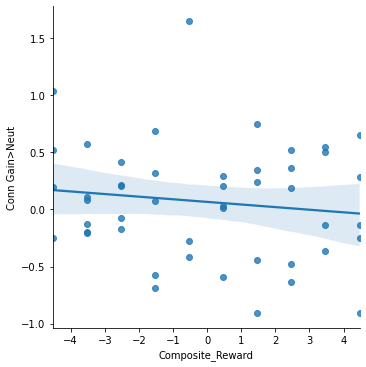

Correlation between Conn Gain>Neut and Squared Composite Reward: 
 R^2 0.003640327536830285 p: 0.6870468676710951


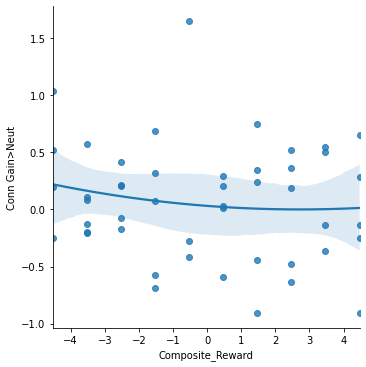

Correlation between Conn Loss>Neut and Composite Reward: 
 R^2 0.02088217136195381 p: 0.3324903297642206


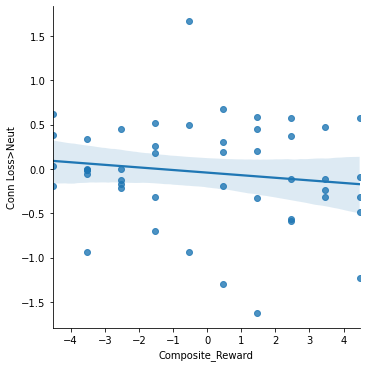

Correlation between Conn Loss>Neut and Squared Composite Reward: 
 R^2 0.004289005364656182 p: 0.6618500524310089


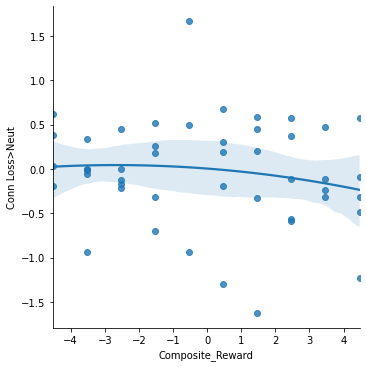

Correlation between Conn Salience and Composite Reward: 
 R^2 0.0035742709304536252 p: 0.6897551289454553


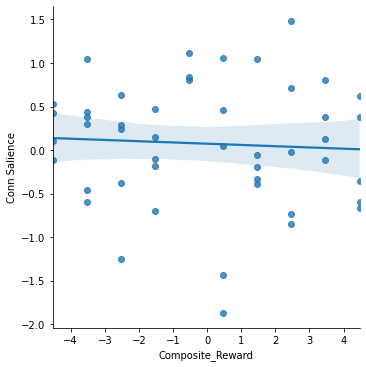

Correlation between Conn Salience and Squared Composite Reward: 
 R^2 0.0008285222795838882 p: 0.8476955413472088


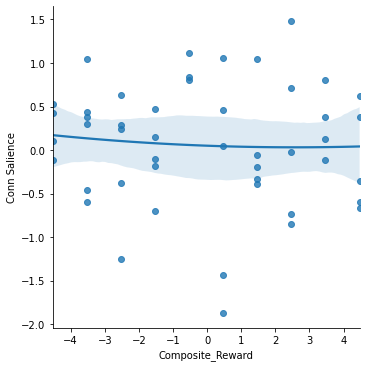

Correlation between Conn Hit-Miss and Composite Reward: 
 R^2 0.00016639201741164785 p: 0.9314223894776802


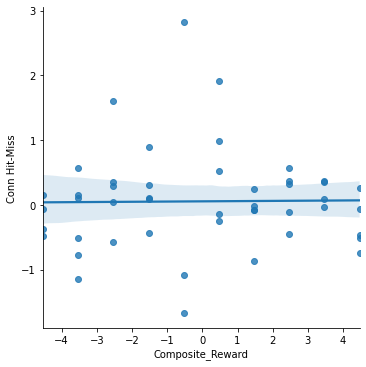

Correlation between Conn Hit-Miss and Squared Composite Reward: 
 R^2 0.05995858606784637 p: 0.0971433180233625


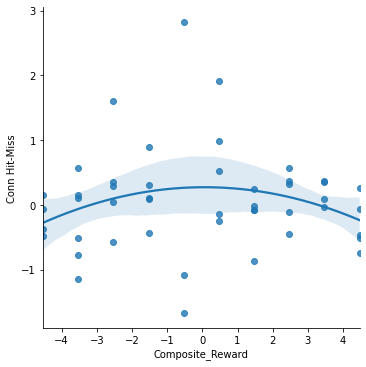

Correlation between Conn LG-SG and Composite Reward: 
 R^2 0.012154051993186407 p: 0.4606933685997904


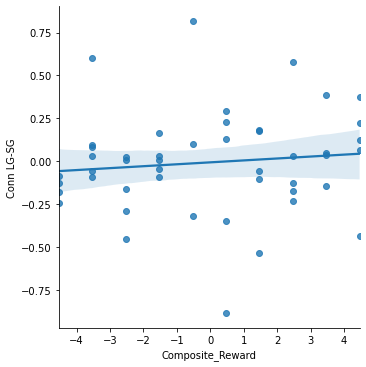

Correlation between Conn LG-SG and Squared Composite Reward: 
 R^2 0.001210410081611166 p: 0.816411954775738


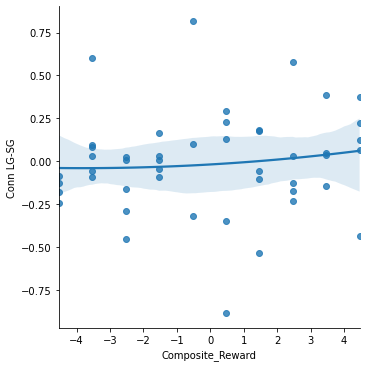

Correlation between Conn LL-SL and Composite Reward: 
 R^2 0.0011546970246372101 p: 0.8206156682142408


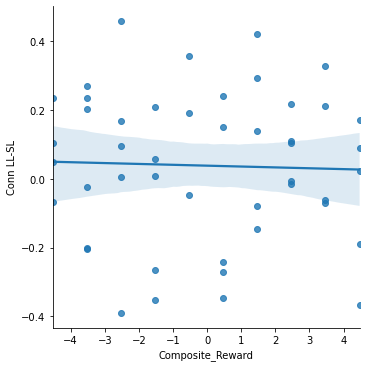

Correlation between Conn LL-SL and Squared Composite Reward: 
 R^2 5.487198010088938e-06 p: 0.9875321374007194


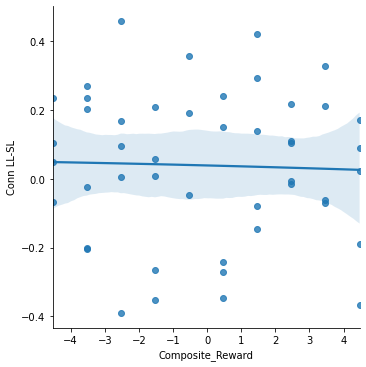

In [13]:
import os
from scipy.stats import pearsonr, spearmanr
masks=['../masks/'+mask for mask in os.listdir('../masks') if mask.startswith('conn_')]
for mask in masks: # Looping through all of David's requested masks
    print("Mask =%s"%(mask))
    plotting.plot_roi(mask,draw_cross=False)
    vs_masker=input_data.NiftiMasker(mask_img=mask)
    plt.show()
    
    data=[] #looping through all of the connectivity analyses
    for fname in df['Fnames-act']:
        sub=re.search('fsl/(.*)/L',fname).group(1)
        level=re.search('sub-..../(.*)_task',fname).group(1)
        activations=[]
        cope_list=[]
        for cope in [8,9,10,11,12,13,14]:#Looping through all of the contrasts

            if level=='L1':#Seperating out if they have only 1 or 2 runs
                image='%s/%s/L1_task-mid_model-1_type-ppi_seed-NAcc_run-1_sm-.feat/stats/cope%s.nii.gz'%(
                fsl_data,sub,cope)
            if level=='L2':
                image='%s/%s/L2_task-mid_model-1_type-ppi_seed-NAcc.gfeat/cope%s.feat/stats/cope1.nii.gz'%(
                fsl_data,sub,cope)

            act_value_array=vs_masker.fit_transform(image)
            act_value=np.mean(act_value_array)
            activations.append(act_value)
            cope_list.append(cope)
        data.append([sub]+activations)

    conn_df=pd.DataFrame(data=data,columns=['Subject','Conn Gain>Loss','Conn Gain>Neut',
             'Conn Loss>Neut','Conn Salience','Conn Hit-Miss','Conn LG-SG','Conn LL-SL'])
    big_df=pd.merge(df,conn_df,on='Subject')
    display(big_df.head())
    copes=[col for col in big_df.columns if col.startswith('Conn')]
    for col in copes:
        r,p=pearsonr(big_df['Composite_Reward'],big_df[col])
        print("Correlation between %s and Composite Reward: \n R^2 %s p: %s"%(
        col,r**2,p))
        sms.lmplot(x='Composite_Reward',y=col,
                   data=big_df)
        plt.show()

        r,p=pearsonr(big_df['Composite_Reward_Squared'],big_df[col])
        print("Correlation between %s and Squared Composite Reward: \n R^2 %s p: %s"%(
        col,r**2,p))
        sms.lmplot(x='Composite_Reward',y=col,
                   data=big_df,order=2)
        plt.show()